In [1]:
from glob import glob
import pandas as pd
import os

In [2]:
measure_list = glob(f"ML*{os.sep}output{os.sep}*measures.csv")
measure_list

['ML_logistic_regression\\output\\logisticregression_experiment01_measures.csv',
 'ML_logistic_regression\\output\\logisticregression_experiment02_measures.csv',
 'ML_logistic_regression\\output\\logisticregression_experiment03_measures.csv',
 'ML_logistic_regression\\output\\logisticregression_experiment04_measures.csv',
 'ML_logistic_regression\\output\\logisticregression_experiment05_measures.csv',
 'ML_logistic_regression\\output\\logisticregression_experiment06_measures.csv',
 'ML_logistic_regression\\output\\logisticregression_experiment07_measures.csv',
 'ML_logistic_regression\\output\\logisticregression_experiment08_measures.csv',
 'ML_logistic_regression\\output\\logisticregression_experiment09_measures.csv',
 'ML_logistic_regression\\output\\logisticregression_experiment10_measures.csv',
 'ML_randomforest\\output\\randomforest_experiment01_measures.csv',
 'ML_randomforest\\output\\randomforest_experiment02_measures.csv',
 'ML_randomforest\\output\\randomforest_experiment03_m

In [34]:
# Read and merge all dataframes
data_frames = [pd.read_csv(file_name) for file_name in measure_list]
merged_df = pd.concat(data_frames, ignore_index=True)
merged_df = merged_df.sort_values(by="Experiment_Number").reset_index(drop=True)
merged_df.to_csv("baseline_model_experiments_summary.csv",index=False)
merged_df

,Model,Seed,Experiment_Number,Accuracy,AUC,F1_Score
0,logisticregression,315491657,1,0.743590,0.776389,0.666667
1,xgboost,315491657,1,0.820513,0.912500,0.781250
2,randomforest,315491657,1,0.807692,0.869444,0.782609
3,logisticregression,135304577,2,0.604396,0.603636,0.437500
4,xgboost,135304577,2,0.758242,0.829091,0.607143
5,randomforest,135304577,2,0.725275,0.843030,0.590164
6,logisticregression,1572185508,3,0.822222,0.860082,0.733333
7,xgboost,1572185508,3,0.788889,0.871252,0.558140
8,randomforest,1572185508,3,0.777778,0.867725,0.583333
9,logisticregression,1029933563,4,0.770115,0.849607,0.655172


In [36]:
# Calculate median, mean, and variance for Accuracy, AUC, and F1_Score grouped by Model
summary_stats = merged_df.groupby('Model')[['Accuracy', 'AUC', 'F1_Score']].agg(['mean']).reset_index()

# Flatten MultiIndex columns for better readability
summary_stats.columns = ['Model', 'Accuracy_Mean', 'AUC_Mean', 'F1_Mean']

summary_stats

,Model,Accuracy_Mean,AUC_Mean,F1_Mean
0,logisticregression,0.735407,0.771508,0.625574
1,randomforest,0.741756,0.803599,0.602977
2,xgboost,0.768656,0.821116,0.650915


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from math import pi

# Set the style for all plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Create a copy of merged_df to avoid modifying the original
df = merged_df.copy()

# Clean model names for better readability in plots
model_name_map = {
    'logisticregression': 'Logistic Regression',
    'xgboost': 'XGBoost',
    'randomforest': 'Random Forest'
}

df['Model_Name'] = df['Model'].map(model_name_map)

# Calculate statistics per model
model_stats = df.groupby('Model_Name').agg({
    'Accuracy': ['mean', 'std', 'min', 'max'],
    'AUC': ['mean', 'std', 'min', 'max'],
    'F1_Score': ['mean', 'std', 'min', 'max']
})

# Flatten the multi-index columns
model_stats.columns = ['_'.join(col).strip('_') for col in model_stats.columns.values]
model_stats = model_stats.reset_index()

# Define metrics for visualization
metrics = ['Accuracy', 'AUC', 'F1_Score']

# 1. Enhanced Box Plots with Individual Data Points
plt.figure(figsize=(18, 10))

colors = sns.color_palette("colorblind", 3)
positions = {
    'Accuracy': [1, 2, 3],
    'AUC': [4.5, 5.5, 6.5],
    'F1_Score': [8, 9, 10]
}

# Create box plots
for i, metric in enumerate(metrics):
    pos = positions[metric]
    for j, model in enumerate(['Logistic Regression', 'XGBoost', 'Random Forest']):
        data = df[df['Model_Name'] == model][metric]
        box = plt.boxplot([data], positions=[pos[j]], patch_artist=True,
                         widths=0.6, showcaps=True, showfliers=False)
        
        # Set color for each box
        for patch in box['boxes']:
            patch.set_facecolor(colors[j])
            patch.set_alpha(0.7)
        
        # Add mean value text
        mean_val = data.mean()
        plt.text(pos[j], mean_val, f'{mean_val:.3f}', 
                 horizontalalignment='center', verticalalignment='bottom',
                 fontweight='bold')
        
        # Add individual data points with jitter
        x_jitter = np.random.normal(pos[j], 0.05, size=len(data))
        plt.scatter(x_jitter, data, color=colors[j], alpha=0.6, s=30)

# Customize the plot
plt.title('Performance Metrics Across Models', fontsize=16, pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([2, 5.5, 9], ['Accuracy', 'AUC', 'F1 Score'], fontsize=14)
plt.xlim(0, 11)
plt.ylabel('Score', fontsize=14)
plt.ylim(0.4, 1.0)

# Add a legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], alpha=0.7, label=model) 
                  for i, model in enumerate(['Logistic Regression', 'XGBoost', 'Random Forest'])]
plt.legend(handles=legend_elements, loc='upper right', fontsize=12)

plt.tight_layout()
plt.savefig('boxplot_comparison.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. Win Counts Analysis
# Count how many times each model was the best for each metric in each experiment
win_counts = {model: {metric: 0 for metric in metrics} for model in df['Model_Name'].unique()}

for seed in df['Seed'].unique():
    seed_data = df[df['Seed'] == seed]
    for metric in metrics:
        best_model = seed_data.loc[seed_data[metric].idxmax()]['Model_Name']
        win_counts[best_model][metric] += 1

# Convert to DataFrame for plotting
win_df = pd.DataFrame([
    {'Model': model, 'Metric': metric, 'Wins': count}
    for model in win_counts
    for metric, count in win_counts[model].items()
])

# Add total wins
total_wins = []
for model in win_counts:
    wins_sum = sum(win_counts[model].values())
    total_wins.append({
        'Model': model,
        'Metric': 'Total',
        'Wins': wins_sum
    })
win_df = pd.concat([win_df, pd.DataFrame(total_wins)], ignore_index=True)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Model', y='Wins', hue='Metric', data=win_df)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)

plt.title('Number of Experiments Where Each Model Performed Best', fontsize=16)
plt.xlabel('')
plt.ylabel('Number of Wins', fontsize=14)
plt.ylim(0, df['Seed'].nunique() + 2)  # Add some space at the top for labels
plt.legend(title='Metric', fontsize=12, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('win_counts.png', dpi=300, bbox_inches='tight')
plt.close()

# 3. Performance Consistency (Std Dev & Range)
consistency_data = []
for model in model_stats['Model_Name']:
    model_data = model_stats[model_stats['Model_Name'] == model]
    
    # Get standard deviations for each metric
    for metric in ['Accuracy', 'AUC', 'F1_Score']:
        std_val = model_data[f'{metric}_std'].values[0]
        range_val = model_data[f'{metric}_max'].values[0] - model_data[f'{metric}_min'].values[0]
        
        consistency_data.append({
            'Model': model,
            'Metric': metric,
            'Type': 'Standard Deviation',
            'Value': std_val
        })
        
        consistency_data.append({
            'Model': model,
            'Metric': metric,
            'Type': 'Range (Max-Min)',
            'Value': range_val
        })

consistency_df = pd.DataFrame(consistency_data)

# Create two subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Standard Deviation Plot
std_df = consistency_df[consistency_df['Type'] == 'Standard Deviation']
sns.barplot(x='Model', y='Value', hue='Metric', data=std_df, ax=axes[0])
axes[0].set_title('Performance Variability - Standard Deviation', fontsize=16)
axes[0].set_ylabel('Standard Deviation', fontsize=14)
axes[0].set_ylim(0, std_df['Value'].max() * 1.2)
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.3f', fontsize=9)

# Range Plot
range_df = consistency_df[consistency_df['Type'] == 'Range (Max-Min)']
sns.barplot(x='Model', y='Value', hue='Metric', data=range_df, ax=axes[1])
axes[1].set_title('Performance Variability - Range (Max-Min)', fontsize=16)
axes[1].set_ylabel('Range Value', fontsize=14)
axes[1].set_ylim(0, range_df['Value'].max() * 1.2)
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.3f', fontsize=9)

plt.tight_layout()
plt.savefig('performance_consistency.png', dpi=300, bbox_inches='tight')
plt.close()

# 4. Scatter Plot Matrix with Density Plots
plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")

# Create a pairplot with additional features
g = sns.pairplot(
    df,
    vars=['Accuracy', 'AUC', 'F1_Score'],
    hue='Model_Name',
    diag_kind='kde',
    corner=True,  # Only show the lower triangle
    plot_kws={'alpha': 0.7, 's': 80, 'edgecolor': 'k', 'linewidth': 0.5},
    diag_kws={'fill': True, 'alpha': 0.5}
)

# Adjust the plot title and appearance
g.fig.suptitle('Relationships Between Different Metrics Across Models', fontsize=16, y=1.02)
g.fig.subplots_adjust(top=0.95)

# Add correlation coefficients to the plots
for i, x in enumerate(['Accuracy', 'AUC', 'F1_Score']):
    for j, y in enumerate(['Accuracy', 'AUC', 'F1_Score']):
        if i > j:  # Lower triangle only
            ax = g.axes[i, j]
            r, p = np.corrcoef(df[x], df[y])[0, 1], 0  # p-value not calculated
            ax.annotate(f'r = {r:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                       ha='left', va='top', fontsize=12, color='black',
                       bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))

plt.savefig('metric_relationships.png', dpi=300, bbox_inches='tight')
plt.close()

# 5. Combined Bar Plot of Mean Performance
# Transform data for easier plotting
mean_data = []
for _, row in model_stats.iterrows():
    model = row['Model_Name']
    for metric in ['Accuracy', 'AUC', 'F1_Score']:
        mean_val = row[f'{metric}_mean']
        std_val = row[f'{metric}_std']
        mean_data.append({
            'Model': model,
            'Metric': metric,
            'Mean': mean_val,
            'Std': std_val
        })

mean_df = pd.DataFrame(mean_data)

plt.figure(figsize=(14, 8))

# Order models by average overall performance
model_order = mean_df.groupby('Model')['Mean'].mean().sort_values(ascending=False).index

# Create grouped bar chart
ax = sns.barplot(x='Model', y='Mean', hue='Metric', data=mean_df, order=model_order)

# Add error bars
for i, bar in enumerate(ax.patches):
    row_idx = i % len(mean_df)
    std = mean_df.iloc[row_idx]['Std']
    bar_height = bar.get_height()
    ax.errorbar(bar.get_x() + bar.get_width()/2, bar_height, yerr=std, fmt='none', c='k', capsize=3)
    
    # Add value labels
    ax.annotate(f'{bar_height:.3f}',
                (bar.get_x() + bar.get_width()/2, bar_height),
                ha='center', va='bottom', fontsize=9)

plt.title('Mean Performance Metrics with Standard Deviation', fontsize=16)
plt.xlabel('')
plt.ylabel('Score', fontsize=14)
plt.ylim(0.4, 1.0)
plt.legend(title='Metric', fontsize=12, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('mean_performance.png', dpi=300, bbox_inches='tight')
plt.close()

# 6. Rank Analysis
# Calculate rankings for each experiment and metric
rank_data = []

for seed in df['Seed'].unique():
    seed_df = df[df['Seed'] == seed]
    
    for metric in metrics:
        # Sort by metric value (descending) to get ranks
        ranked = seed_df.sort_values(by=metric, ascending=False).reset_index(drop=True)
        for i, row in ranked.iterrows():
            rank = i + 1  # 1-based ranking
            rank_data.append({
                'Experiment': row['Experiment_Number'],
                'Model': row['Model_Name'],
                'Metric': metric,
                'Value': row[metric],
                'Rank': rank
            })

rank_df = pd.DataFrame(rank_data)

# Calculate average rank for each model/metric combination
avg_ranks = rank_df.groupby(['Model', 'Metric'])['Rank'].mean().reset_index()
avg_ranks['Rank'] = avg_ranks['Rank'].round(2)

# Create a heatmap of average ranks
avg_ranks_pivot = avg_ranks.pivot(index='Model', columns='Metric', values='Rank')

plt.figure(figsize=(12, 8))
ax = sns.heatmap(avg_ranks_pivot, annot=True, cmap='YlGnBu_r', fmt='.2f',
               linewidths=0.5, cbar_kws={'label': 'Average Rank (Lower is Better)'})

plt.title('Average Rank by Model and Metric (1 = Best, 3 = Worst)', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.savefig('average_rank_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()

# 7. Performance Across Experiments
plt.figure(figsize=(15, 12))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 1, i)
    
    for model in df['Model_Name'].unique():
        model_data = df[df['Model_Name'] == model]
        plt.plot(model_data['Experiment_Number'], model_data[metric], 'o-', 
                 linewidth=2, markersize=8, label=model, alpha=0.8)
    
    plt.title(f'{metric} Performance Across Experiments', fontsize=14)
    plt.xlabel('Experiment Number', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(range(1, df['Experiment_Number'].max() + 1))
    
    if metric == 'Accuracy':
        plt.ylim(0.55, 0.85)
    elif metric == 'AUC':
        plt.ylim(0.6, 0.95)
    elif metric == 'F1_Score':
        plt.ylim(0.4, 0.85)
        
    if i == 1:  # Only add legend to the first subplot
        plt.legend(fontsize=12)

plt.tight_layout()
plt.savefig('performance_by_experiment.png', dpi=300, bbox_inches='tight')
plt.close()

# 8. Combined Metrics Radar Chart
def create_radar_chart(df, metrics, model_col='Model_Name', title=''):
    # Number of variables
    num_vars = len(metrics)
    
    # Calculate angles for each variable
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]  # Close the loop
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # Get the unique models
    models = df[model_col].unique()
    
    # Create a color for each model
    colors = sns.color_palette("colorblind", len(models))
    
    # Draw one line per model and fill area
    for i, model in enumerate(models):
        model_data = df[df[model_col] == model]
        
        # Extract the values for this model
        values = []
        for metric in metrics:
            values.append(model_data[metric].mean())
        values += values[:1]  # Close the loop
        
        # Draw the line and fill the area
        ax.plot(angles, values, 'o-', linewidth=2, markersize=8, 
                label=model, color=colors[i], alpha=0.8)
        ax.fill(angles, values, color=colors[i], alpha=0.1)
    
    # Fix axis to go in the right order and start at 12 o'clock
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw axis lines for each angle and label
    ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
    
    # Go through labels and adjust alignment
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')
    
    # Set chart limits and add legend
    ax.set_ylim(0.4, 1.0)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    plt.title(title, size=16, y=1.1)
    return fig, ax

# Create radar chart
fig, ax = create_radar_chart(
    df, 
    metrics=['Accuracy', 'AUC', 'F1_Score'], 
    model_col='Model_Name',
    title='Model Performance Comparison Across All Metrics'
)

plt.tight_layout()
plt.savefig('radar_chart.png', dpi=300, bbox_inches='tight')
plt.close()

# 9. Statistical Significance Testing (t-test)
from scipy import stats

# Create a table to store p-values
p_value_data = []

for metric in metrics:
    for model1 in df['Model_Name'].unique():
        for model2 in df['Model_Name'].unique():
            if model1 < model2:  # Only do each pair once
                values1 = df[df['Model_Name'] == model1][metric]
                values2 = df[df['Model_Name'] == model2][metric]
                
                t_stat, p_val = stats.ttest_ind(values1, values2, equal_var=False)
                
                # Store results
                p_value_data.append({
                    'Metric': metric,
                    'Model1': model1,
                    'Model2': model2,
                    'P-Value': p_val,
                    'Significant': p_val < 0.05
                })

p_value_df = pd.DataFrame(p_value_data)

# Create a significance heatmap for each metric
for metric in metrics:
    metric_pvals = p_value_df[p_value_df['Metric'] == metric].copy()
    
    # Create a matrix of p-values
    models = sorted(df['Model_Name'].unique())
    p_matrix = np.ones((len(models), len(models)))
    
    for _, row in metric_pvals.iterrows():
        i = models.index(row['Model1'])
        j = models.index(row['Model2'])
        p_matrix[i, j] = row['P-Value']
        p_matrix[j, i] = row['P-Value']  # Mirror the matrix
    
    # Set diagonal to 1 (no test against self)
    np.fill_diagonal(p_matrix, 1)
    
    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(p_matrix, annot=True, fmt='.3f', cmap='RdYlGn_r', 
                xticklabels=models, yticklabels=models, vmin=0, vmax=0.1)
    
    plt.title(f'P-Values for {metric} (p < 0.05 indicates significant difference)', fontsize=14)
    plt.tight_layout()
    plt.savefig(f'{metric}_significance.png', dpi=300, bbox_inches='tight')
    plt.close()

# 10. Create an Overall Performance Score
# Calculate a normalized score for each metric and experiment
normalized_scores = []

for seed in df['Seed'].unique():
    seed_data = df[df['Seed'] == seed]
    
    for metric in metrics:
        # Get min and max for normalization
        min_val = seed_data[metric].min()
        max_val = seed_data[metric].max()
        range_val = max_val - min_val
        
        # Normalize each score to 0-1 range
        for _, row in seed_data.iterrows():
            # Avoid division by zero
            if range_val > 0:
                norm_score = (row[metric] - min_val) / range_val
            else:
                norm_score = 0.5  # If all models have same score
                
            normalized_scores.append({
                'Experiment': row['Experiment_Number'],
                'Model': row['Model_Name'],
                'Metric': metric,
                'Original_Value': row[metric],
                'Normalized_Score': norm_score
            })

norm_df = pd.DataFrame(normalized_scores)

# Calculate average normalized score across all metrics and experiments
avg_norm_scores = norm_df.groupby('Model')['Normalized_Score'].mean().reset_index()
avg_norm_scores['Normalized_Score'] = avg_norm_scores['Normalized_Score'].round(4)
avg_norm_scores = avg_norm_scores.sort_values('Normalized_Score', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(avg_norm_scores['Model'], avg_norm_scores['Normalized_Score'], color=colors)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.4f}', ha='center', fontsize=12)

plt.title('Overall Normalized Performance Score Across All Metrics and Experiments', fontsize=14)
plt.xlabel('')
plt.ylabel('Average Normalized Score (Higher is Better)', fontsize=12)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('overall_performance_score.png', dpi=300, bbox_inches='tight')
plt.close()

print("All visualizations have been created and saved as PNG files.")

All visualizations have been created and saved as PNG files.


<Figure size 1600x1200 with 0 Axes>

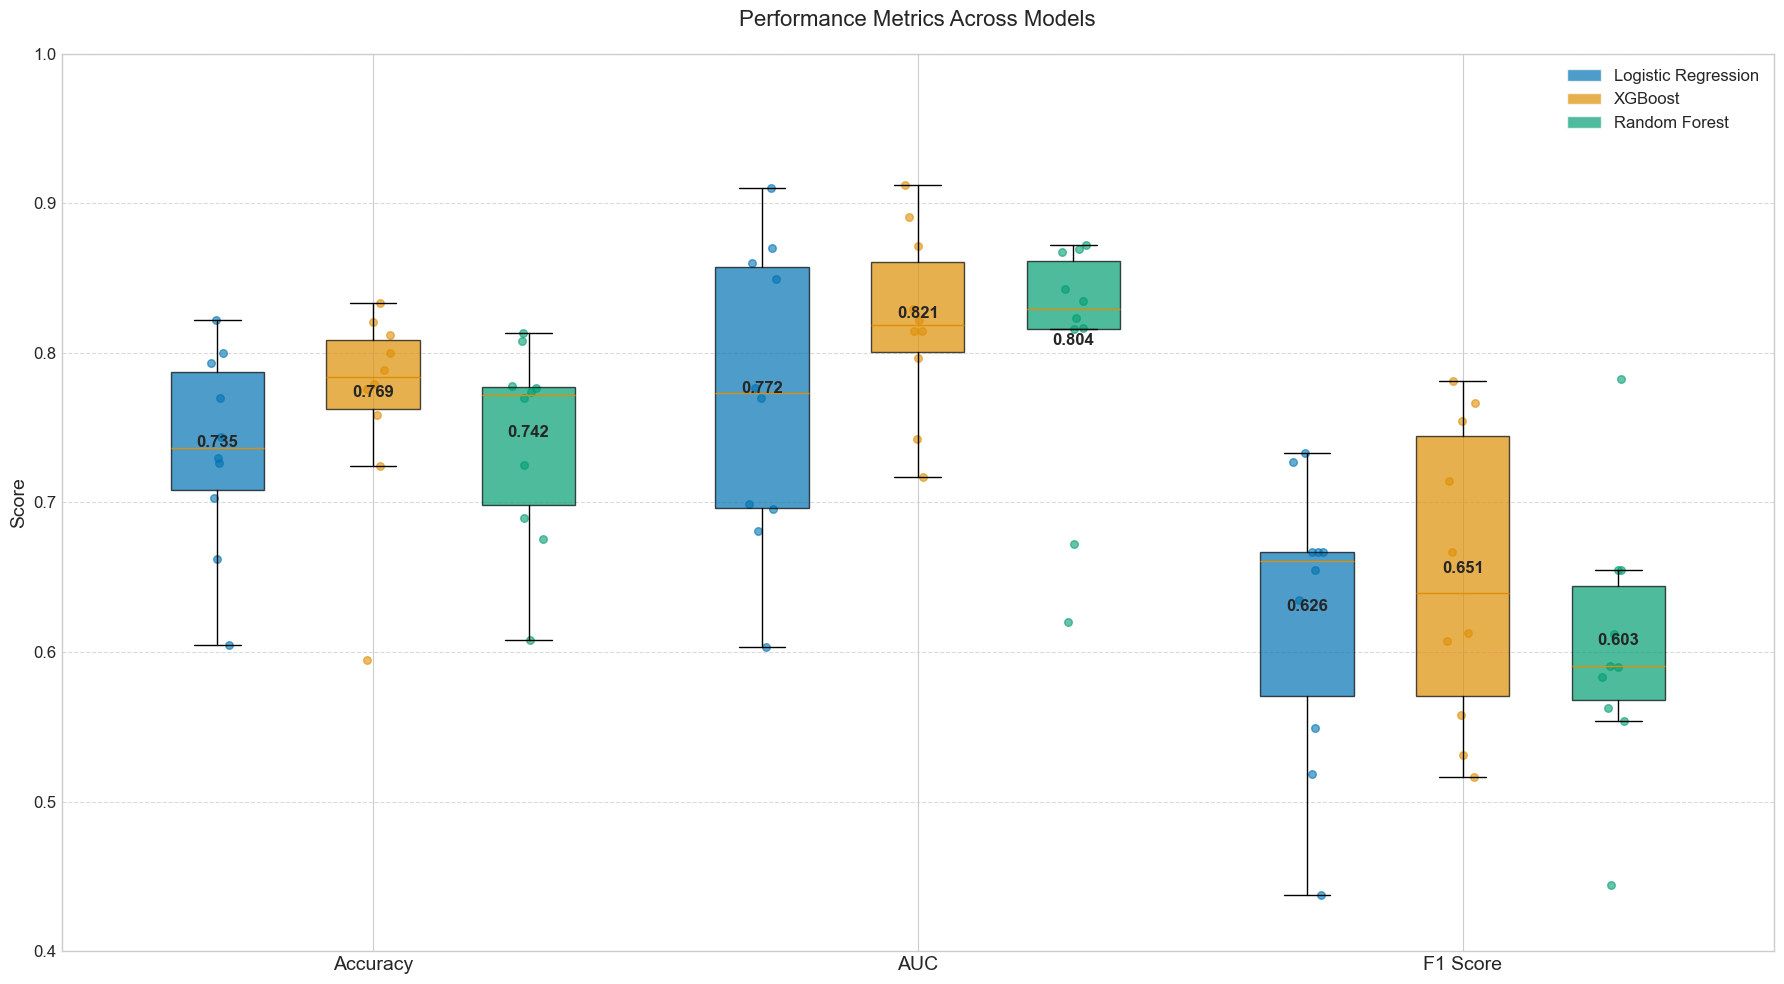

In [104]:
# Create a copy of merged_df to avoid modifying the original
df = merged_df.copy()

# Clean model names for better readability in plots
model_name_map = {
    'logisticregression': 'Logistic Regression',
    'xgboost': 'XGBoost',
    'randomforest': 'Random Forest'
}

df['Model_Name'] = df['Model'].map(model_name_map)

# Calculate statistics per model
model_stats = df.groupby('Model_Name').agg({
    'Accuracy': ['mean', 'std', 'min', 'max'],
    'AUC': ['mean', 'std', 'min', 'max'],
    'F1_Score': ['mean', 'std', 'min', 'max']
})

# Flatten the multi-index columns
model_stats.columns = ['_'.join(col).strip('_') for col in model_stats.columns.values]
model_stats = model_stats.reset_index()

# Define metrics for visualization
metrics = ['Accuracy', 'AUC', 'F1_Score']

# 1. Enhanced Box Plots with Individual Data Points
plt.figure(figsize=(18, 10))

colors = sns.color_palette("colorblind", 3)
positions = {
    'Accuracy': [1, 2, 3],
    'AUC': [4.5, 5.5, 6.5],
    'F1_Score': [8, 9, 10]
}

# Create box plots
for i, metric in enumerate(metrics):
    pos = positions[metric]
    for j, model in enumerate(['Logistic Regression', 'XGBoost', 'Random Forest']):
        data = df[df['Model_Name'] == model][metric]
        box = plt.boxplot([data], positions=[pos[j]], patch_artist=True,
                         widths=0.6, showcaps=True, showfliers=False)
        
        # Set color for each box
        for patch in box['boxes']:
            patch.set_facecolor(colors[j])
            patch.set_alpha(0.7)
        
        # Add mean value text
        mean_val = data.mean()
        plt.text(pos[j], mean_val, f'{mean_val:.3f}', 
                 horizontalalignment='center', verticalalignment='bottom',
                 fontweight='bold')
        
        # Add individual data points with jitter
        x_jitter = np.random.normal(pos[j], 0.05, size=len(data))
        plt.scatter(x_jitter, data, color=colors[j], alpha=0.6, s=30)

# Customize the plot
plt.title('Performance Metrics Across Models', fontsize=16, pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([2, 5.5, 9], ['Accuracy', 'AUC', 'F1 Score'], fontsize=14)
plt.xlim(0, 11)
plt.ylabel('Score', fontsize=14)
plt.ylim(0.4, 1.0)

# Add a legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], alpha=0.7, label=model) 
                  for i, model in enumerate(['Logistic Regression', 'XGBoost', 'Random Forest'])]
plt.legend(handles=legend_elements, loc='upper right', fontsize=12)

plt.tight_layout()
#plt.savefig('boxplot_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

=== MODEL RANKING FROM BEST TO WORST ===
1. XGBoost
   Accuracy: 0.7687
   AUC: 0.8211
   F1 Score: 0.6509
   Overall Performance: 0.7469

2. Random Forest
   Accuracy: 0.7418
   AUC: 0.8036
   F1 Score: 0.6030
   Overall Performance: 0.7161

3. Logistic Regression
   Accuracy: 0.7354
   AUC: 0.7715
   F1 Score: 0.6256
   Overall Performance: 0.7108



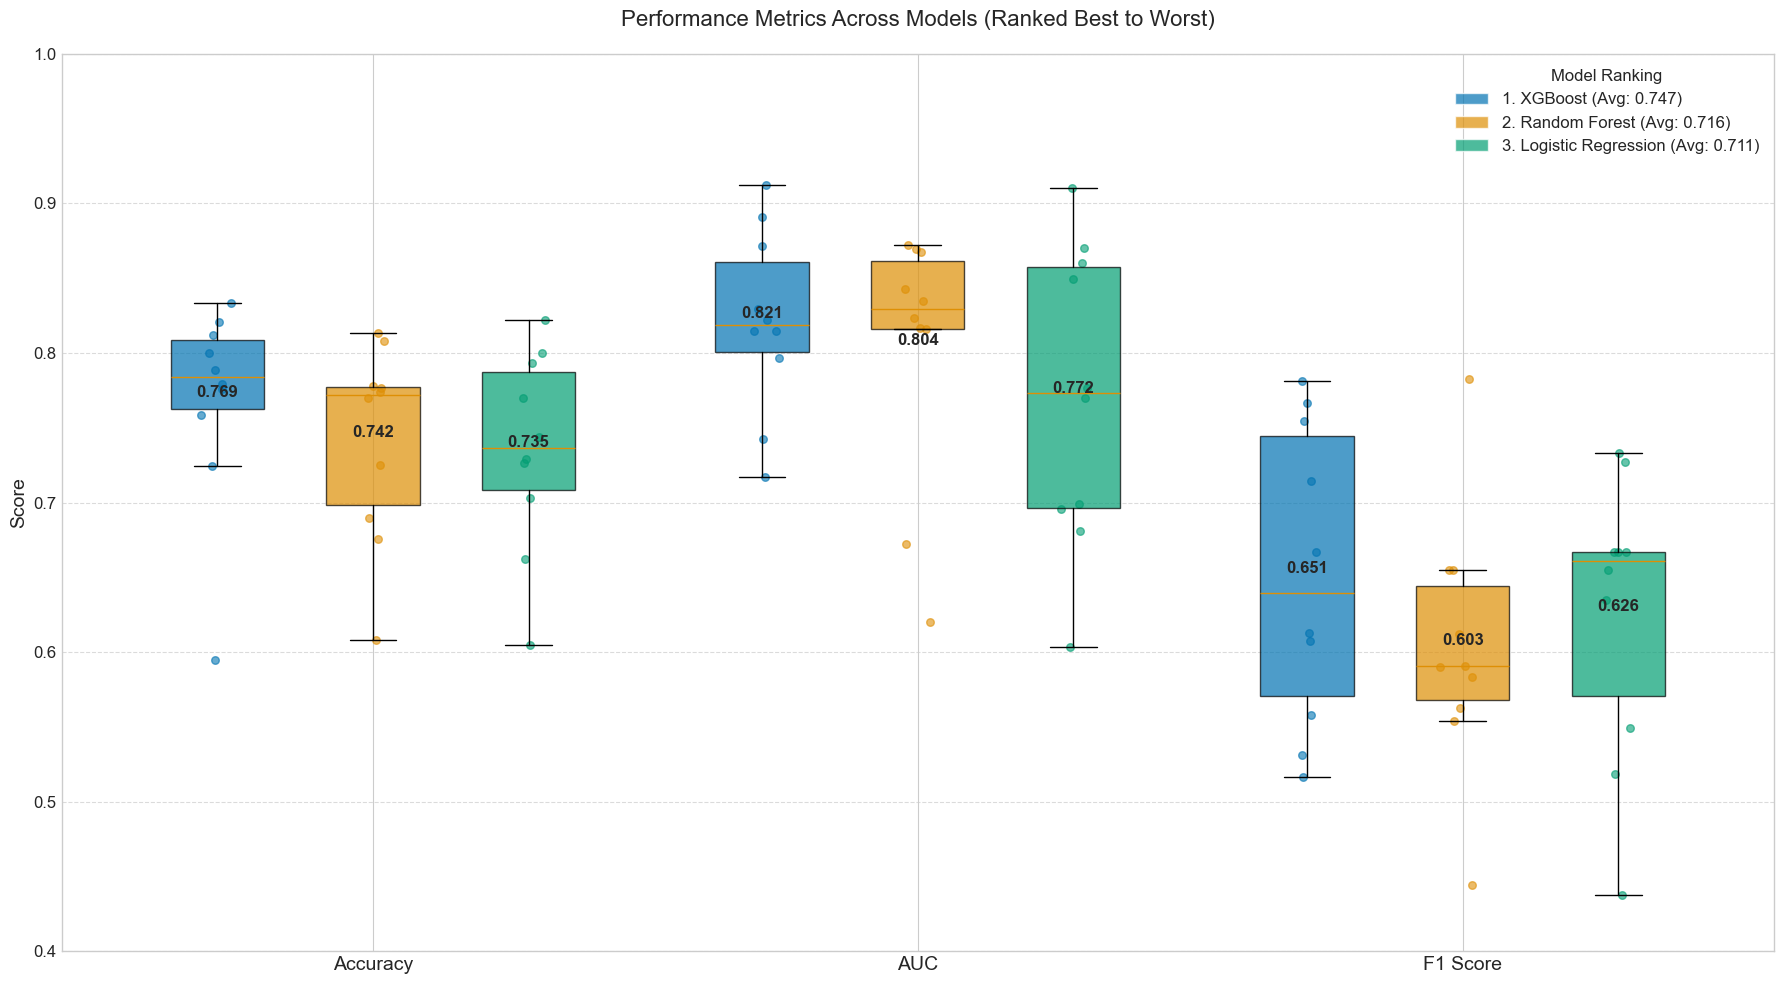

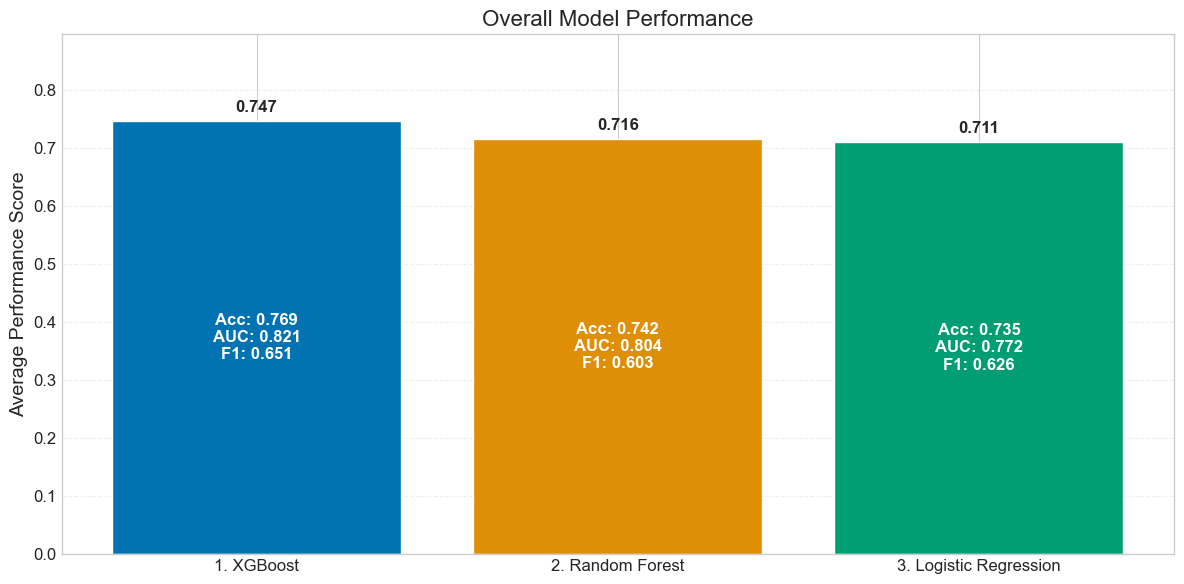

In [118]:
# Create a copy of merged_df to avoid modifying the original
df = merged_df.copy()

# Clean model names for better readability in plots
model_name_map = {
    'logisticregression': 'Logistic Regression',
    'xgboost': 'XGBoost',
    'randomforest': 'Random Forest'
}
df['Model_Name'] = df['Model'].map(model_name_map)

# Calculate statistics per model
model_stats = df.groupby('Model_Name').agg({
    'Accuracy': ['mean', 'std', 'min', 'max'],
    'AUC': ['mean', 'std', 'min', 'max'],
    'F1_Score': ['mean', 'std', 'min', 'max']
})

# Flatten the multi-index columns
model_stats.columns = ['_'.join(col).strip('_') for col in model_stats.columns.values]
model_stats = model_stats.reset_index()

# Calculate overall performance (average of all metrics)
model_stats['Overall_Performance'] = model_stats[['Accuracy_mean', 'AUC_mean', 'F1_Score_mean']].mean(axis=1)

# Rank the models based on overall performance
model_stats = model_stats.sort_values('Overall_Performance', ascending=False).reset_index(drop=True)
model_stats['Rank'] = model_stats.index + 1

# Create a mapping from model name to rank
model_rank_map = dict(zip(model_stats['Model_Name'], model_stats['Rank']))

# Print ranking results
print("=== MODEL RANKING FROM BEST TO WORST ===")
for i, row in model_stats.iterrows():
    print(f"{int(row['Rank'])}. {row['Model_Name']}")
    print(f"   Accuracy: {row['Accuracy_mean']:.4f}")
    print(f"   AUC: {row['AUC_mean']:.4f}")
    print(f"   F1 Score: {row['F1_Score_mean']:.4f}")
    print(f"   Overall Performance: {row['Overall_Performance']:.4f}")
    print()

# Define metrics for visualization
metrics = ['Accuracy', 'AUC', 'F1_Score']

# 1. Enhanced Box Plots with Individual Data Points and Rankings
plt.figure(figsize=(18, 10))
colors = sns.color_palette("colorblind", 3)

# Order models by rank for the plot
ranked_models = model_stats['Model_Name'].tolist()

positions = {
    'Accuracy': [1, 2, 3],
    'AUC': [4.5, 5.5, 6.5],
    'F1_Score': [8, 9, 10]
}

# Create box plots
for i, metric in enumerate(metrics):
    pos = positions[metric]
    for j, model in enumerate(ranked_models):
        data = df[df['Model_Name'] == model][metric]
        rank = model_rank_map[model]
        box = plt.boxplot([data], positions=[pos[j]], patch_artist=True,
                         widths=0.6, showcaps=True, showfliers=False)
        
        # Set color for each box
        for patch in box['boxes']:
            patch.set_facecolor(colors[j])
            patch.set_alpha(0.7)
        
        # Add mean value text
        mean_val = data.mean()
        plt.text(pos[j], mean_val, f'{mean_val:.3f}', 
                 horizontalalignment='center', verticalalignment='bottom',
                 fontweight='bold')
        
        
        # Add individual data points with jitter
        x_jitter = np.random.normal(pos[j], 0.05, size=len(data))
        plt.scatter(x_jitter, data, color=colors[j], alpha=0.6, s=30)

# Customize the plot
plt.title('Performance Metrics Across Models (Ranked Best to Worst)', fontsize=16, pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([2, 5.5, 9], ['Accuracy', 'AUC', 'F1 Score'], fontsize=14)
plt.xlim(0, 11)
plt.ylabel('Score', fontsize=14)
plt.ylim(0.4, 1.0)

# Add a legend with rank information
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], alpha=0.7, 
                        label=f"{i+1}. {model} (Avg: {model_stats[model_stats['Model_Name']==model]['Overall_Performance'].values[0]:.3f})") 
                  for i, model in enumerate(ranked_models)]
plt.legend(handles=legend_elements, loc='upper right', fontsize=12, title="Model Ranking")


plt.tight_layout()
plt.savefig('ranked_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# 2. Add a summary bar chart showing overall performance
plt.figure(figsize=(12, 6))

# Create bar chart for overall performance
bars = plt.bar(range(len(ranked_models)), 
        model_stats['Overall_Performance'], 
        color=colors)

# Add model names and ranks
plt.xticks(range(len(ranked_models)), 
          [f"{i+1}. {model}" for i, model in enumerate(ranked_models)], 
          fontsize=12)

# Add performance values on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}',
            ha='center', va='bottom', fontweight='bold')

# Add performance breakdown inside bars
for i, model in enumerate(ranked_models):
    row = model_stats[model_stats['Model_Name'] == model].iloc[0]
    plt.text(i, row['Overall_Performance']/2,
            f"Acc: {row['Accuracy_mean']:.3f}\nAUC: {row['AUC_mean']:.3f}\nF1: {row['F1_Score_mean']:.3f}",
            ha='center', va='center', color='white', fontweight='bold')

plt.title('Overall Model Performance', fontsize=16)
plt.ylabel('Average Performance Score', fontsize=14)
plt.ylim(0, max(model_stats['Overall_Performance']) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('overall_performance_ranking.png', dpi=300, bbox_inches='tight')
plt.show()

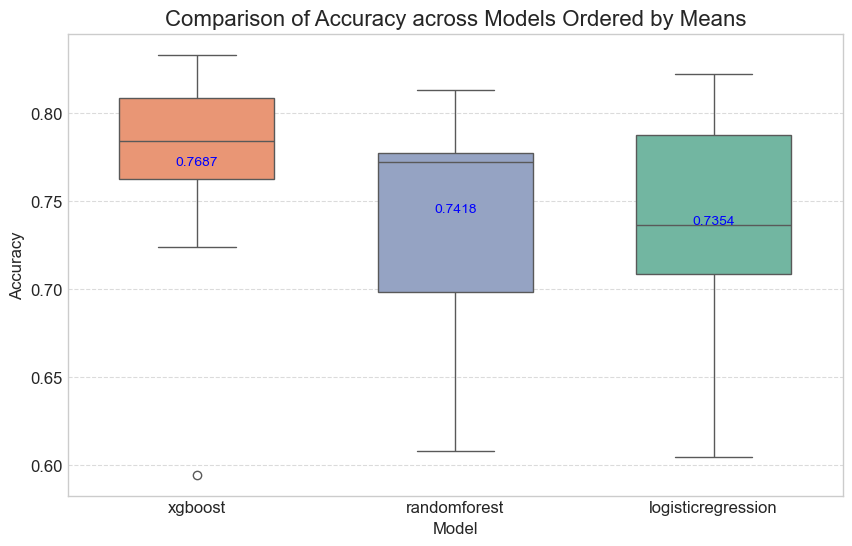

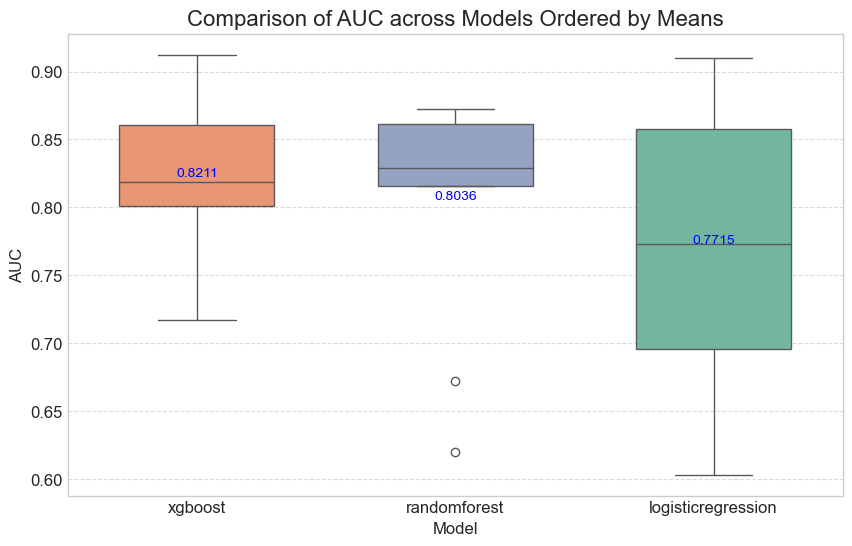

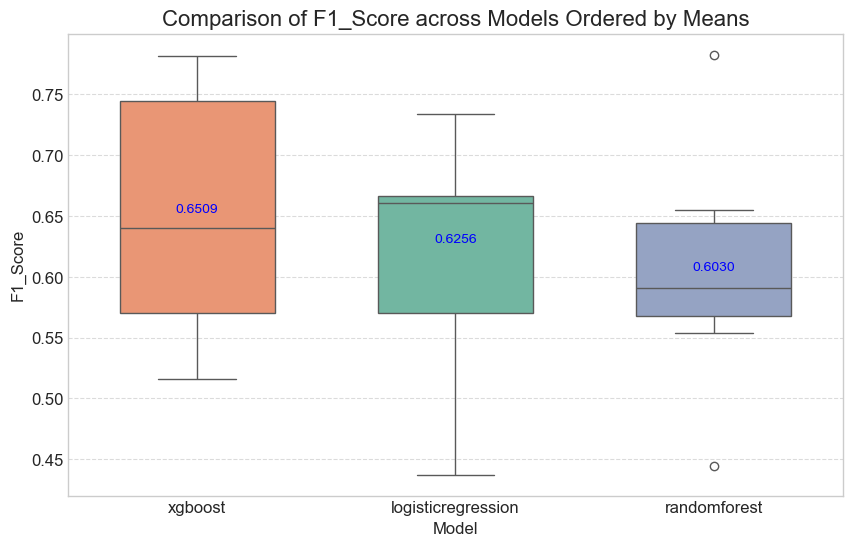

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots comparing Accuracy, AUC, and F1_Score for different models with dynamically calculated means
# Order models by mean dynamically and create the boxplots
for metric in ['Accuracy', 'AUC', 'F1_Score']:
    # Calculate means and order by them
    means = merged_df.groupby('Model')[metric].mean().sort_values(ascending=False)
    ordered_models = means.index.tolist()

    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(data=merged_df, x='Model', y=metric, hue='Model', palette="Set2", dodge=False, width=0.6, order=ordered_models)

    # Overlay the means on the boxplots
    for i, model in enumerate(ordered_models):
        mean_value = means[model]
        plt.text(i, mean_value, f'{mean_value:.4f}', ha='center', va='bottom', fontsize=10, color='blue')

    plt.title(f'Comparison of {metric} across Models Ordered by Means', fontsize=16)
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend([], [], frameon=False)  # Hide legend as it duplicates the x-axis labels
    plt.show()

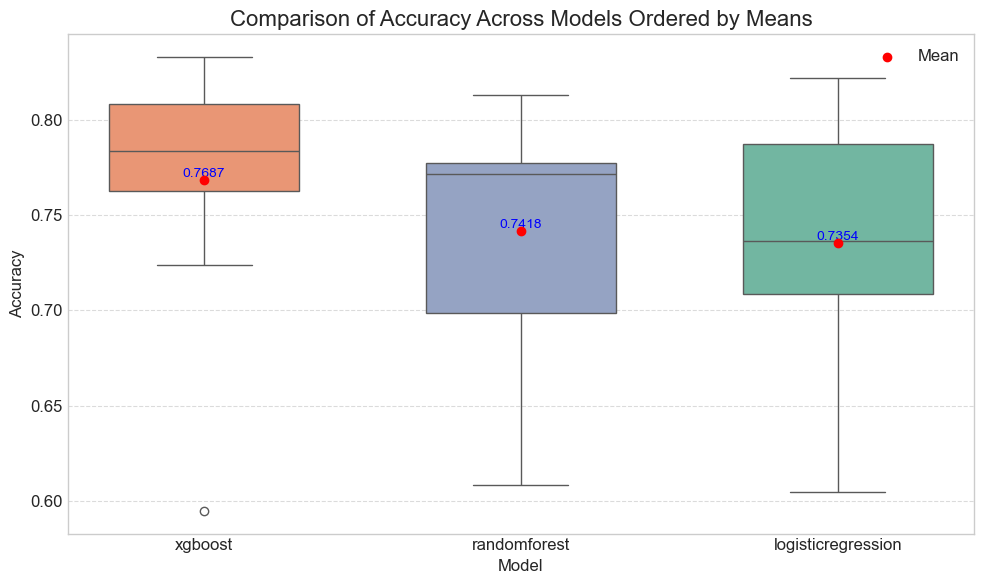

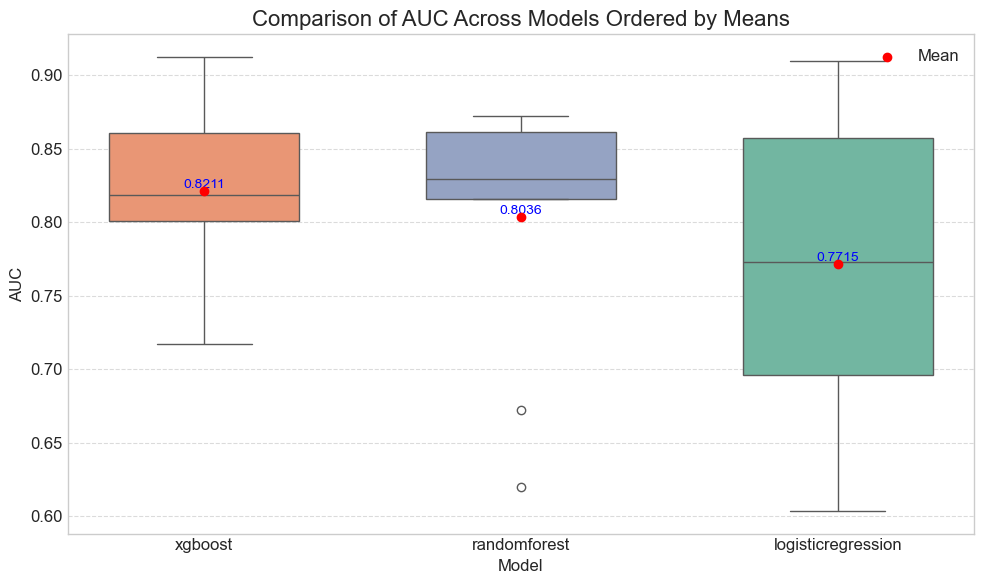

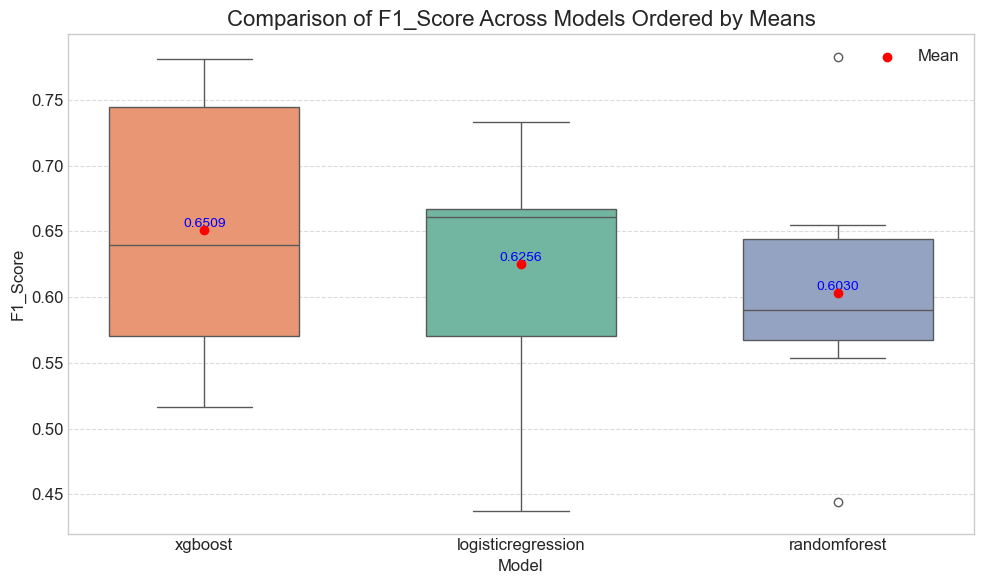

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots comparing Accuracy, AUC, and F1_Score for different models with dynamically calculated means
for metric in ['Accuracy', 'AUC', 'F1_Score']:
    # Calculate means and order models by their means
    means = merged_df.groupby('Model')[metric].mean().sort_values(ascending=False)
    ordered_models = means.index.tolist()
    
    plt.figure(figsize=(10, 6))
    
    # Create the boxplot with hue parameter to fix the FutureWarning
    ax = sns.boxplot(
        data=merged_df, 
        x='Model', 
        y=metric, 
        hue='Model',  # Add hue parameter to match the x variable
        palette="Set2", 
        dodge=False, 
        width=0.6, 
        order=ordered_models,
        legend=False  # Hide the legend as it's redundant
    )
    
    # Overlay the means as dots on the boxplots
    for i, model in enumerate(ordered_models):
        mean_value = means[model]
        plt.scatter(i, mean_value, color='red', label='Mean' if i == 0 else "", zorder=5)
        plt.text(i, mean_value, f'{mean_value:.4f}', ha='center', va='bottom', fontsize=10, color='blue')
    
    plt.title(f'Comparison of {metric} Across Models Ordered by Means', fontsize=16)
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='upper right', frameon=False)  # Add legend for clarity
    plt.xticks()
    plt.tight_layout()
    plt.show()

In [22]:
merged_df.to_csv("merged_df.csv", index=False)

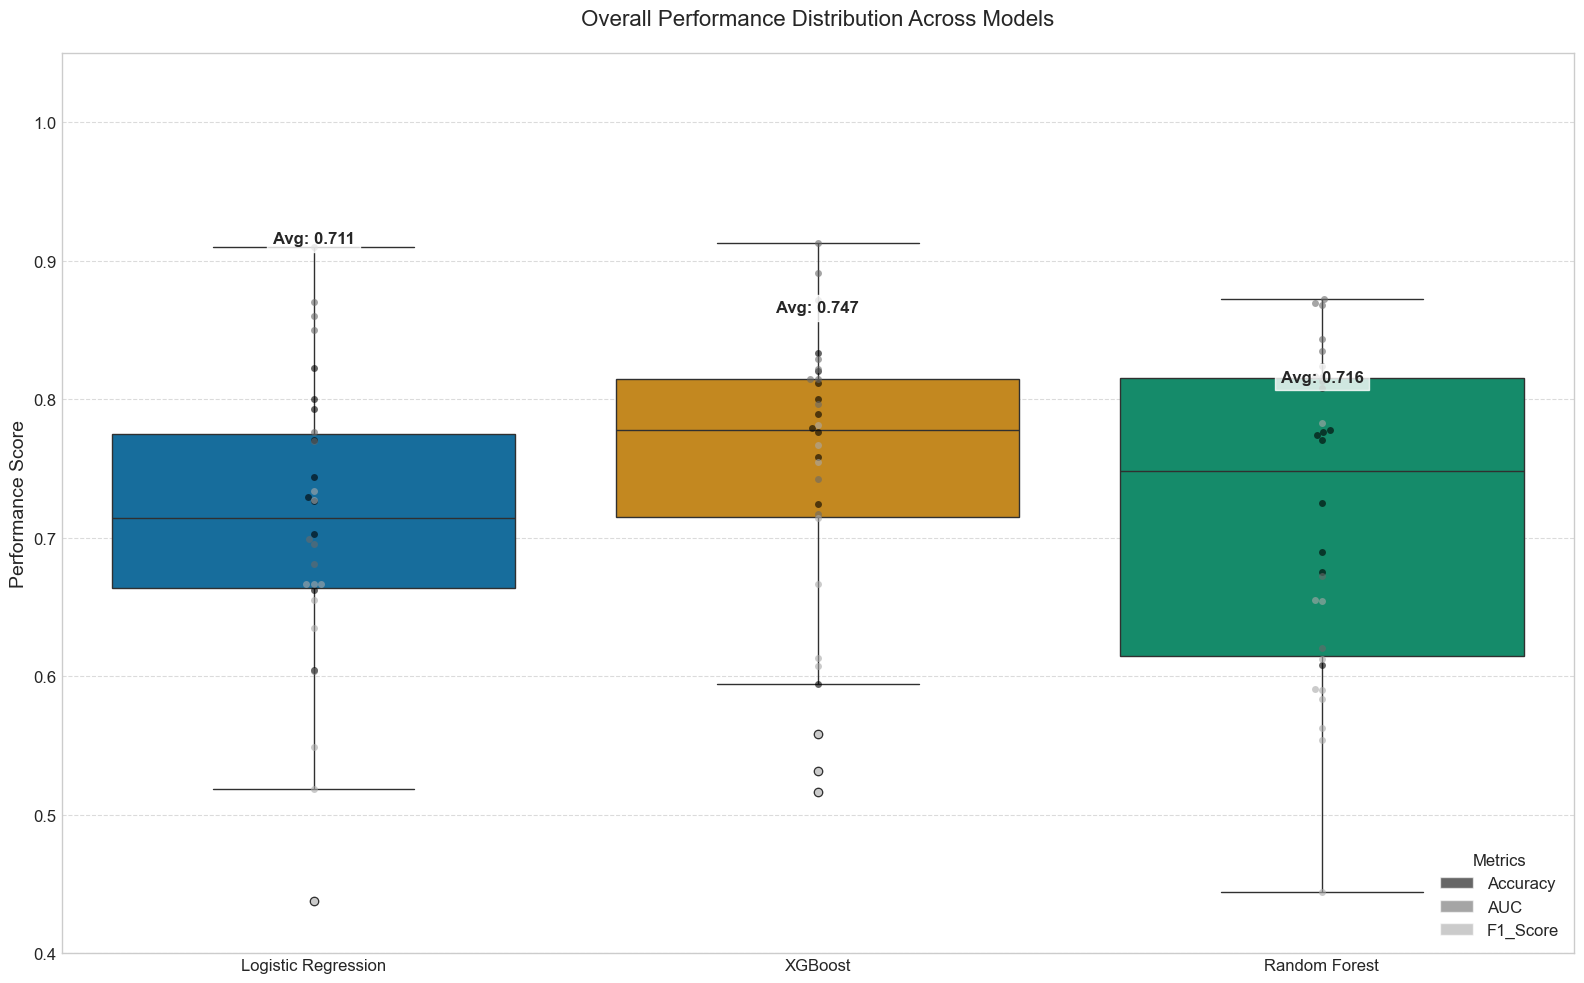

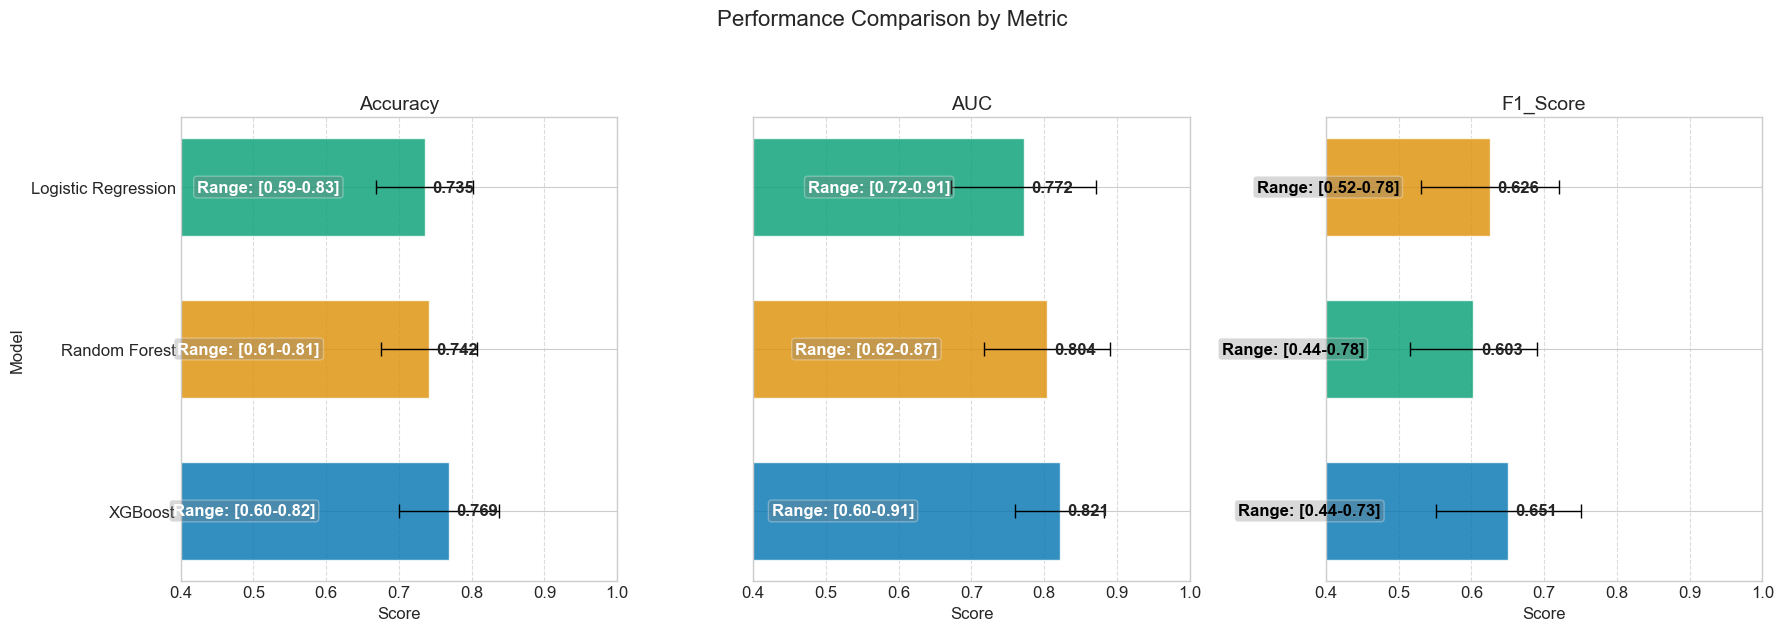

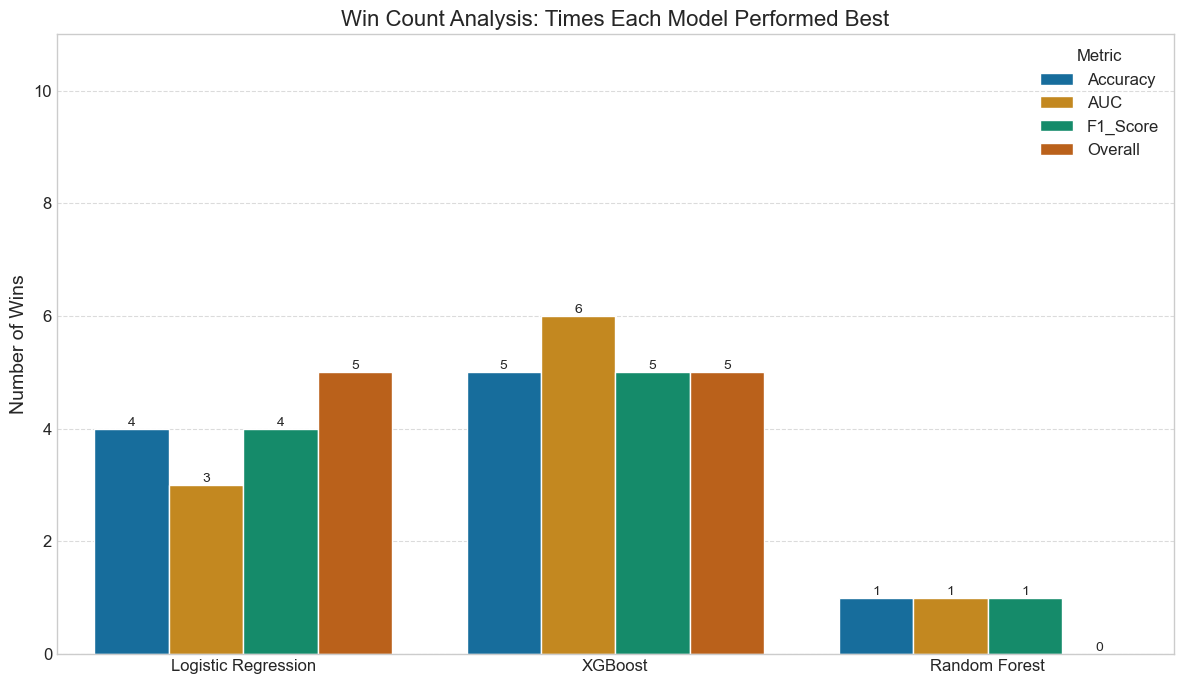

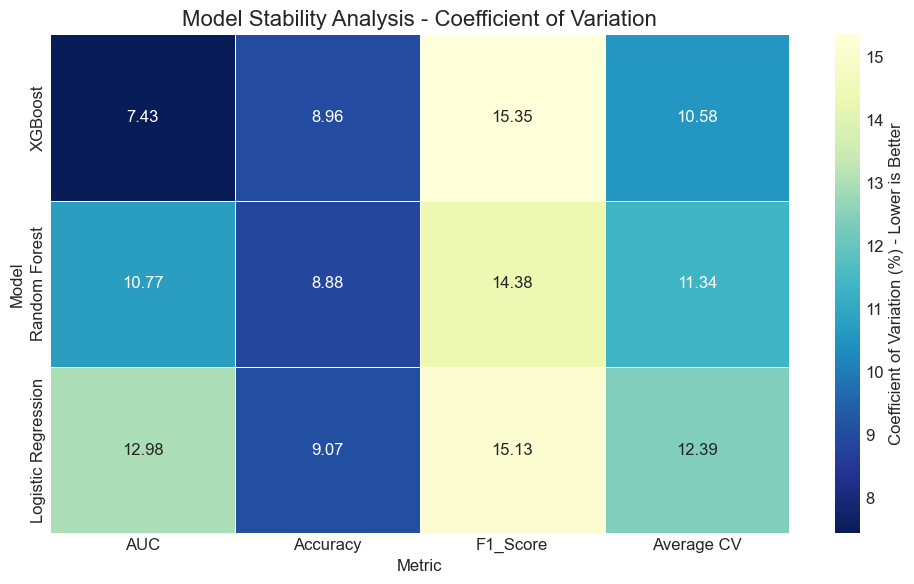

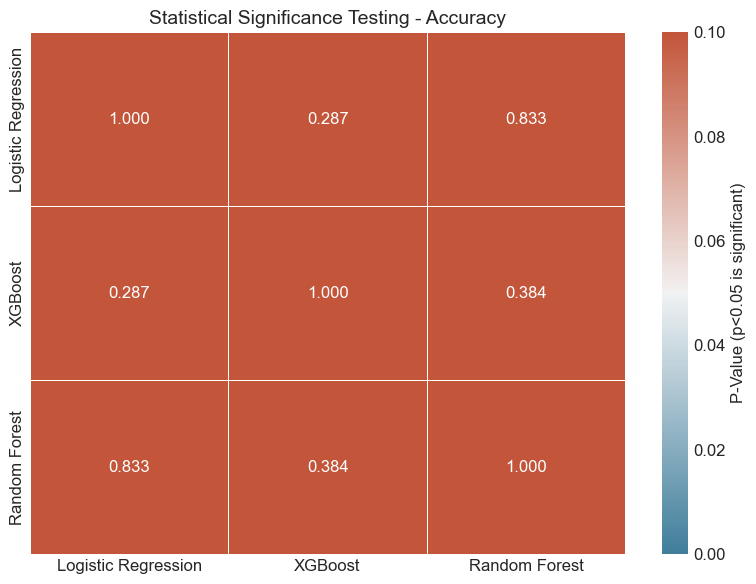

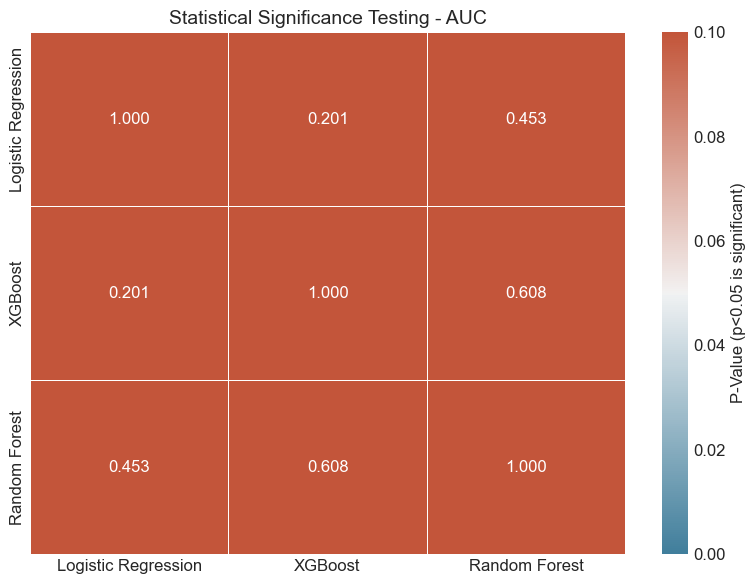

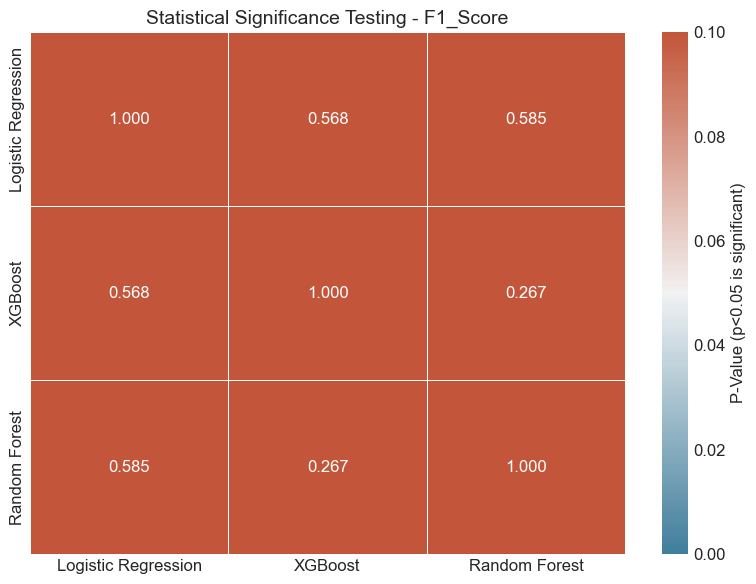


--- Accuracy Significance Testing ---


,Model 1,Model 2,Mean Difference,P-Value,Significant,Cohen's d,Effect Size
0,Logistic Regression,XGBoost,0.033249,0.287117,False,0.490592,Small
1,Logistic Regression,Random Forest,0.006349,0.832791,False,0.095798,Small
2,XGBoost,Random Forest,0.026900,0.383880,False,0.399176,Small



--- AUC Significance Testing ---


,Model 1,Model 2,Mean Difference,P-Value,Significant,Cohen's d,Effect Size
3,Logistic Regression,XGBoost,0.049609,0.201061,False,0.598281,Medium
4,Logistic Regression,Random Forest,0.032092,0.453408,False,0.342876,Small
5,XGBoost,Random Forest,0.017517,0.608000,False,0.233936,Small



--- F1_Score Significance Testing ---


,Model 1,Model 2,Mean Difference,P-Value,Significant,Cohen's d,Effect Size
6,Logistic Regression,XGBoost,0.025341,0.567724,False,0.260334,Small
7,Logistic Regression,Random Forest,0.022597,0.584653,False,0.248956,Small
8,XGBoost,Random Forest,0.047938,0.267117,False,0.512486,Medium


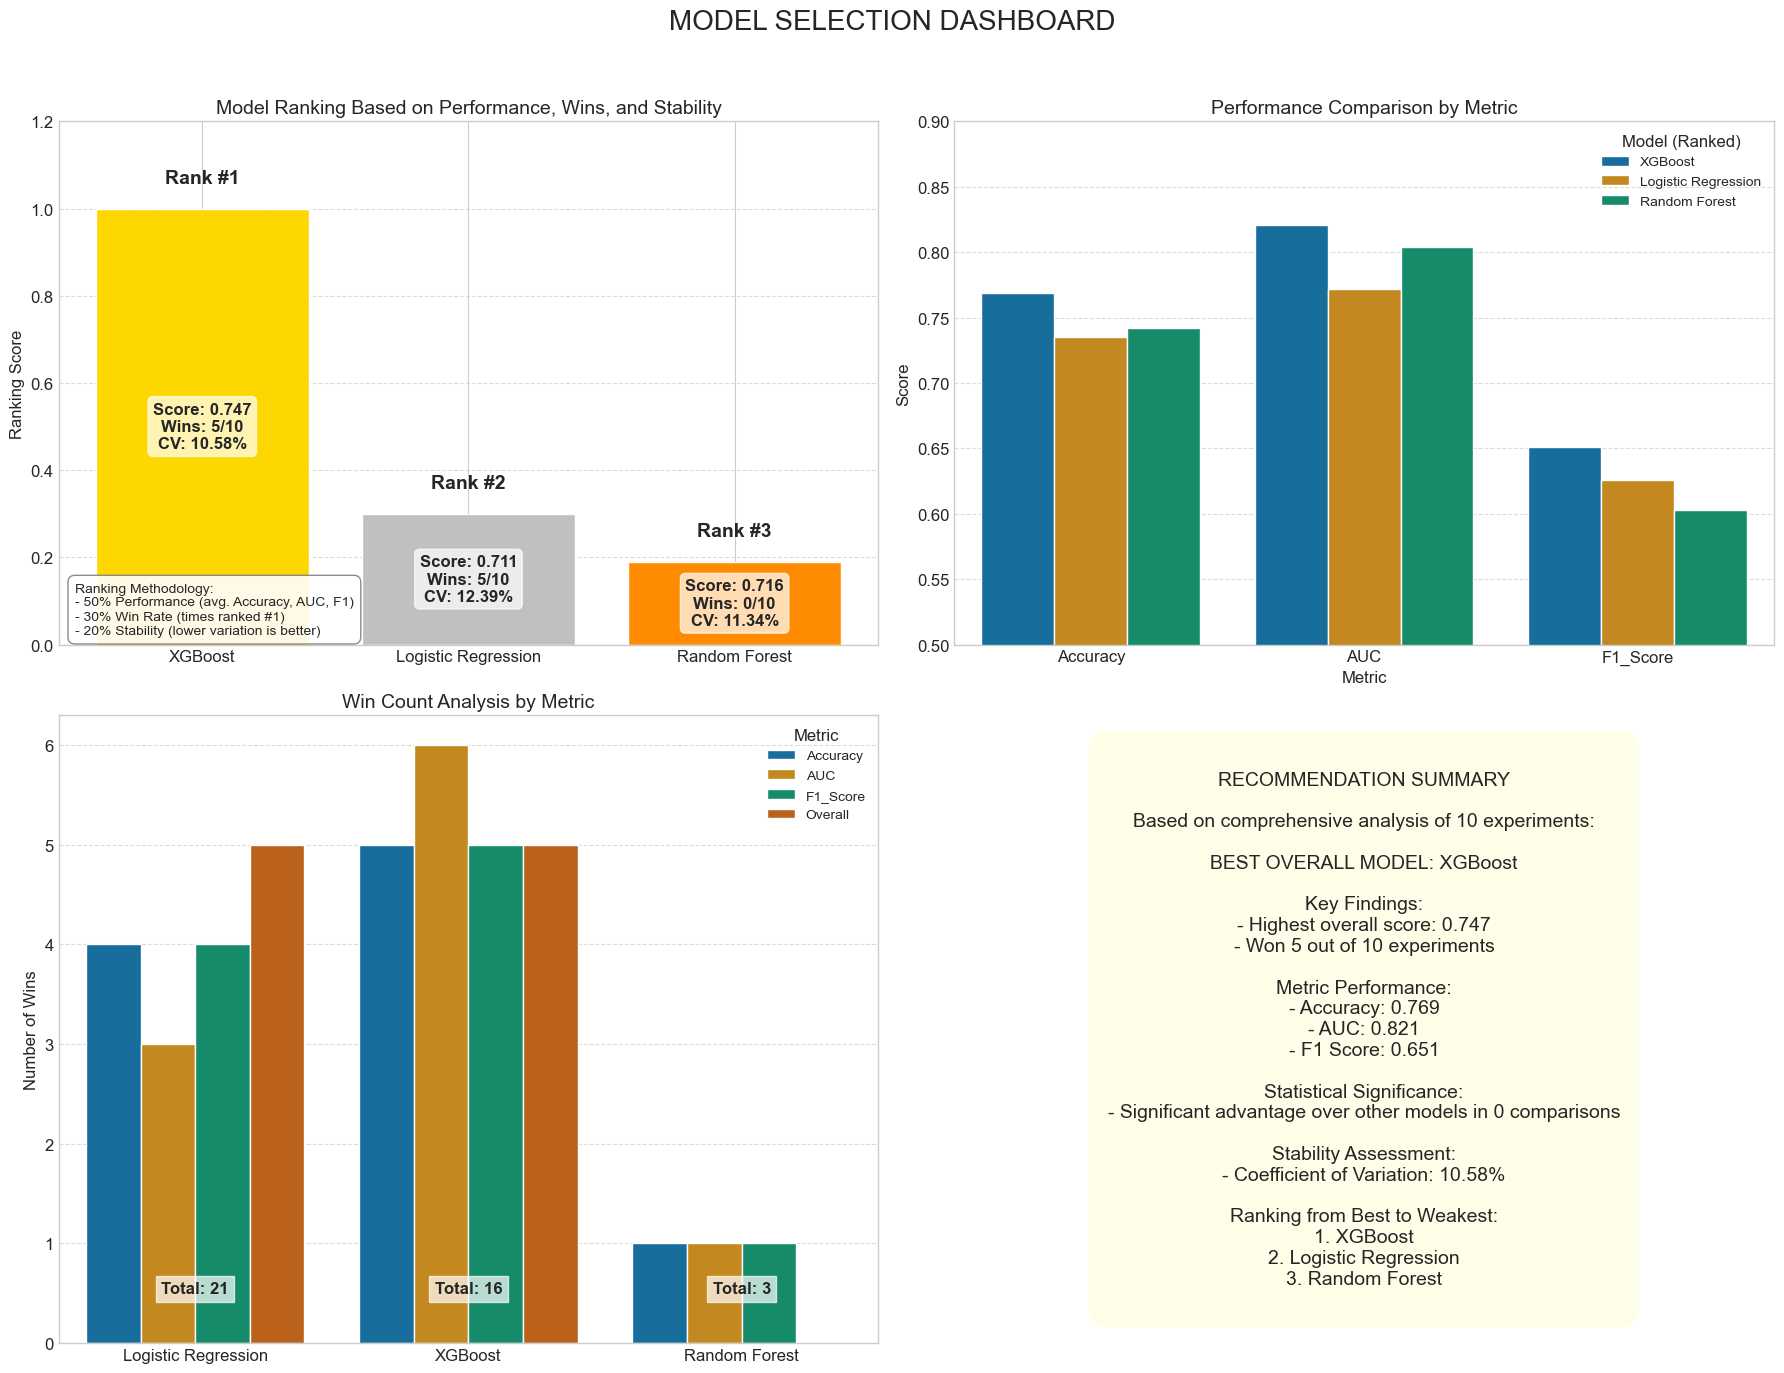


=== MODEL RANKING FROM BEST TO WEAKEST ===

1. XGBoost
   Overall Score: 0.747
   Performance: Accuracy = 0.769, AUC = 0.821, F1 Score = 0.651
   Wins: 5 out of 10 experiments
   Stability: Coefficient of Variation = 10.58%

2. Logistic Regression
   Overall Score: 0.711
   Performance: Accuracy = 0.735, AUC = 0.772, F1 Score = 0.626
   Wins: 5 out of 10 experiments
   Stability: Coefficient of Variation = 12.39%

3. Random Forest
   Overall Score: 0.716
   Performance: Accuracy = 0.742, AUC = 0.804, F1 Score = 0.603
   Wins: 0 out of 10 experiments
   Stability: Coefficient of Variation = 11.34%

All visualizations have been created and saved to 'model_comparison_figures/' directory


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.ticker import FormatStrFormatter
import os
from matplotlib.patches import Patch

# Create output directory for saved figures
os.makedirs('model_comparison_figures', exist_ok=True)

# Set the style for all plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Clean model names for better readability in plots
model_name_map = {
    'logisticregression': 'Logistic Regression',
    'xgboost': 'XGBoost',
    'randomforest': 'Random Forest'
}

# Add readable model names to the dataframe
merged_df['Model_Name'] = merged_df['Model'].map(model_name_map)

# Define metrics for visualization
metrics = ['Accuracy', 'AUC', 'F1_Score']

# ---------------------- 1. OVERALL PERFORMANCE BOXPLOTS ----------------------
# Compare distributions of all metrics across models
plt.figure(figsize=(16, 10))

# Get melted data for plotting
melted_data = pd.melt(merged_df, id_vars=['Model_Name', 'Seed', 'Experiment_Number'], 
                       value_vars=metrics, var_name='metric', value_name='value')

# Create box plots with color-coded by model
ax = sns.boxplot(x='Model_Name', y='value', hue='Model_Name', 
               data=melted_data, dodge=False)

# Add swarmplot to show individual data points - fixed to avoid warning
swarm_colors = {'Accuracy': 'black', 'AUC': 'dimgray', 'F1_Score': 'darkgray'}
for metric in metrics:
    metric_data = melted_data[melted_data['metric'] == metric]
    sns.swarmplot(x='Model_Name', y='value', data=metric_data,
                 color=swarm_colors[metric], alpha=0.6, size=5, 
                 dodge=True, ax=ax, label=metric)

# Add mean values as text
for i, model in enumerate(merged_df['Model_Name'].unique()):
    model_data = merged_df[merged_df['Model_Name'] == model]
    avg_metrics = model_data[metrics].mean().round(3)
    y_pos = merged_df[metrics].max().max() - 0.05 * i
    plt.text(i, y_pos, f"Avg: {avg_metrics.mean():.3f}", 
             ha='center', fontweight='bold', bbox=dict(facecolor='white', alpha=0.8))

# Customize the plot
plt.title('Overall Performance Distribution Across Models', fontsize=16, pad=20)
plt.ylabel('Performance Score', fontsize=14)
plt.xlabel('')
plt.ylim(0.4, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create custom legend
handles = [Patch(facecolor=swarm_colors[m], alpha=0.6, label=m) for m in metrics]
plt.legend(handles=handles, title='Metrics', loc='lower right')

# Save figure
plt.tight_layout()
plt.savefig('model_comparison_figures/overall_performance_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------------------- 2. METRIC-SPECIFIC PERFORMANCE ----------------------
# Visualize each metric separately with error bars

# Calculate statistics per model for each metric
model_stats = {}
for metric in metrics:
    model_stats[metric] = merged_df.groupby('Model_Name')[metric].agg(['mean', 'std', 'min', 'max']).reset_index()
    # Order by mean performance (descending)
    model_stats[metric] = model_stats[metric].sort_values('mean', ascending=False)

# Create subplots for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Performance Comparison by Metric', fontsize=16, y=1.05)

for i, metric in enumerate(metrics):
    ax = axes[i]
    stats_df = model_stats[metric]
    
    # Create horizontal bar plot
    bars = ax.barh(stats_df['Model_Name'], stats_df['mean'], 
                  xerr=stats_df['std'], height=0.6, 
                  color=sns.color_palette("colorblind")[:3], alpha=0.8,
                  error_kw=dict(ecolor='black', lw=1, capsize=5, capthick=1))
    
    # Add value labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', va='center', fontweight='bold')
    
    # Add min-max range text with better contrast
    for j, row in stats_df.iterrows():
        text_color = 'white' if row['mean'] > 0.7 else 'black'
        ax.text(row['mean'] - 0.15, j, 
                f"Range: [{row['min']:.2f}-{row['max']:.2f}]", 
                va='center', ha='right', color=text_color, fontweight='bold',
                bbox=dict(facecolor='gray', alpha=0.3, boxstyle='round,pad=0.2'))
    
    # Customize plot
    ax.set_title(f'{metric}', fontsize=14)
    ax.set_xlim(0.4, 1.0)
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)
    if i == 0:
        ax.set_ylabel('Model', fontsize=12)
    ax.set_xlabel('Score', fontsize=12)

plt.tight_layout()
plt.savefig('model_comparison_figures/metric_specific_performance.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------------------- 3. WIN RATE ANALYSIS ----------------------
# Count how many times each model was the best for each metric and overall

# Initialize win counts dictionary
win_counts = {model: {metric: 0 for metric in metrics + ['Overall']} 
              for model in merged_df['Model_Name'].unique()}

# Count wins
for exp_num in merged_df['Experiment_Number'].unique():
    group = merged_df[merged_df['Experiment_Number'] == exp_num]
    
    # For each metric, find the winning model
    for metric in metrics:
        best_model = group.loc[group[metric].idxmax()]['Model_Name']
        win_counts[best_model][metric] += 1
    
    # Calculate overall win (model with highest average across metrics)
    avg_scores = group.groupby('Model_Name')[metrics].mean().mean(axis=1)
    overall_best = avg_scores.idxmax()
    win_counts[overall_best]['Overall'] += 1

# Convert to dataframe for visualization
win_df = pd.DataFrame([
    {'Model': model, 'Metric': metric, 'Wins': count}
    for model in win_counts
    for metric, count in win_counts[model].items()
])

# Create a grouped bar chart
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Model', y='Wins', hue='Metric', data=win_df)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)

# Customize plot
plt.title('Win Count Analysis: Times Each Model Performed Best', fontsize=16)
plt.xlabel('')
plt.ylabel('Number of Wins', fontsize=14)
plt.ylim(0, merged_df['Experiment_Number'].nunique() + 1)
plt.legend(title='Metric', fontsize=12, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('model_comparison_figures/win_counts.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------------------- 4. STABILITY ANALYSIS ----------------------
# Visualize how consistent each model's performance is

# Calculate coefficient of variation (normalized standard deviation)
cv_data = []
for model in merged_df['Model_Name'].unique():
    model_data = merged_df[merged_df['Model_Name'] == model]
    
    for metric in metrics:
        mean = model_data[metric].mean()
        std = model_data[metric].std()
        cv = (std / mean) * 100  # CV as percentage
        
        cv_data.append({
            'Model': model,
            'Metric': metric,
            'CV (%)': cv
        })

cv_df = pd.DataFrame(cv_data)

# Create a heatmap of coefficient of variation (lower is better - more stable)
plt.figure(figsize=(10, 6))
cv_pivot = cv_df.pivot(index='Model', columns='Metric', values='CV (%)')

# Calculate average CV for each model and add as a column
cv_pivot['Average CV'] = cv_pivot.mean(axis=1)

# Sort the heatmap by average CV (most stable first)
cv_pivot = cv_pivot.sort_values('Average CV')

# Create heatmap with improved colors and annotations
sns.heatmap(cv_pivot, annot=True, cmap='YlGnBu_r', fmt='.2f', 
            linewidths=0.5, cbar_kws={'label': 'Coefficient of Variation (%) - Lower is Better'})

plt.title('Model Stability Analysis - Coefficient of Variation', fontsize=16)
plt.tight_layout()
plt.savefig('model_comparison_figures/stability_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------------------- 5. STATISTICAL SIGNIFICANCE TESTING ----------------------
# Perform t-tests to determine if differences are statistically significant

# Create empty dataframe to store results
significance_results = []

models = merged_df['Model_Name'].unique()
for metric in metrics:
    for i, model1 in enumerate(models):
        for j, model2 in enumerate(models):
            if i < j:  # Compare each pair once
                data1 = merged_df[merged_df['Model_Name'] == model1][metric]
                data2 = merged_df[merged_df['Model_Name'] == model2][metric]
                
                # Perform t-test
                t_stat, p_val = stats.ttest_ind(data1, data2, equal_var=False)
                
                # Calculate effect size (Cohen's d)
                mean1, mean2 = data1.mean(), data2.mean()
                pooled_std = np.sqrt((data1.std()**2 + data2.std()**2) / 2)
                cohen_d = abs(mean1 - mean2) / pooled_std if pooled_std > 0 else 0
                
                # Store results
                significance_results.append({
                    'Metric': metric,
                    'Model 1': model1,
                    'Model 2': model2,
                    'Model 1 Mean': mean1,
                    'Model 2 Mean': mean2,
                    'Mean Difference': abs(mean1 - mean2),
                    'P-Value': p_val,
                    'Significant': p_val < 0.05,
                    "Cohen's d": cohen_d,
                    'Effect Size': 'Small' if cohen_d < 0.5 else ('Medium' if cohen_d < 0.8 else 'Large')
                })

# Convert to dataframe
sig_df = pd.DataFrame(significance_results)

# Create heatmap of p-values for each metric
for metric in metrics:
    metric_sig = sig_df[sig_df['Metric'] == metric].copy()
    
    # Create a matrix of p-values
    p_matrix = pd.DataFrame(1.0, index=models, columns=models)
    for _, row in metric_sig.iterrows():
        p_matrix.loc[row['Model 1'], row['Model 2']] = row['P-Value']
        p_matrix.loc[row['Model 2'], row['Model 1']] = row['P-Value']
    
    plt.figure(figsize=(8, 6))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(p_matrix, annot=True, fmt='.3f', cmap=cmap, 
                vmin=0, vmax=0.10, linewidths=0.5,
                cbar_kws={'label': 'P-Value (p<0.05 is significant)'})
    
    plt.title(f'Statistical Significance Testing - {metric}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f'model_comparison_figures/{metric}_significance.png', dpi=300, bbox_inches='tight')
    plt.show()

# Display significance results in a table
for metric in metrics:
    metric_results = sig_df[sig_df['Metric'] == metric]
    if not metric_results.empty:
        print(f"\n--- {metric} Significance Testing ---")
        display_df = metric_results[['Model 1', 'Model 2', 'Mean Difference', 'P-Value', 
                                    'Significant', "Cohen's d", 'Effect Size']]
        display(display_df)

# ---------------------- 6. MODEL RANKING ----------------------
# Calculate a comprehensive ranking of models

# Calculate mean performance metrics for each model
mean_metrics = merged_df.groupby('Model_Name')[metrics].mean().reset_index()

# Calculate overall mean score across all metrics
mean_metrics['Overall_Score'] = mean_metrics[metrics].mean(axis=1)

# Count overall wins
overall_wins = win_df[win_df['Metric'] == 'Overall'].set_index('Model')['Wins']
mean_metrics['Win_Count'] = mean_metrics['Model_Name'].map(overall_wins)

# Add stability metrics
mean_cv = cv_df.groupby('Model')['CV (%)'].mean().reset_index()
mean_cv.columns = ['Model_Name', 'Mean_CV']
mean_metrics = pd.merge(mean_metrics, mean_cv, on='Model_Name')

# Define metrics and weights for ranking
weights = {
    'Overall_Score': 0.5,   # 50% performance
    'Win_Count': 0.3,       # 30% win rate
    'Mean_CV': 0.2          # 20% stability (inverted since lower is better)
}

# Normalize each metric to 0-1 scale
for col in ['Overall_Score', 'Win_Count']:
    min_val = mean_metrics[col].min()
    max_val = mean_metrics[col].max() 
    mean_metrics[f'{col}_Norm'] = (mean_metrics[col] - min_val) / (max_val - min_val) if max_val > min_val else 0.5

# For CV, lower is better, so invert the normalization
min_cv = mean_metrics['Mean_CV'].min()
max_cv = mean_metrics['Mean_CV'].max()
mean_metrics['Mean_CV_Norm'] = (max_cv - mean_metrics['Mean_CV']) / (max_cv - min_cv) if max_cv > min_cv else 0.5

# Calculate final weighted score
mean_metrics['Ranking_Score'] = (
    weights['Overall_Score'] * mean_metrics['Overall_Score_Norm'] + 
    weights['Win_Count'] * mean_metrics['Win_Count_Norm'] + 
    weights['Mean_CV'] * mean_metrics['Mean_CV_Norm']
)

# Sort and add rank
final_ranking = mean_metrics.sort_values('Ranking_Score', ascending=False).reset_index(drop=True)
final_ranking['Rank'] = range(1, len(final_ranking) + 1)

# ---------------------- 7. FINAL RECOMMENDATION DASHBOARD ----------------------
# Create a comprehensive model comparison dashboard

# Create a 2x2 subplot for the dashboard
fig, axes = plt.subplots(2, 2, figsize=(18, 14), gridspec_kw={'height_ratios': [1, 1.2]})

# Top left: Overall ranking
ax1 = axes[0, 0]
colors = ['gold', 'silver', 'darkorange']
bars = ax1.bar(final_ranking['Model_Name'], final_ranking['Ranking_Score'], color=colors)

# Add rank labels
for i, (bar, rank) in enumerate(zip(bars, final_ranking['Rank'])):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.05, 
             f"Rank #{rank}", ha='center', va='bottom', fontweight='bold', fontsize=14)

# Add metric values inside bars
for i, row in final_ranking.iterrows():
    bar_height = bars[i].get_height()
    y_pos = bar_height / 2
    ax1.text(i, y_pos, 
             f"Score: {row['Overall_Score']:.3f}\nWins: {row['Win_Count']}/{len(merged_df['Experiment_Number'].unique())}\nCV: {row['Mean_CV']:.2f}%", 
             ha='center', va='center', fontweight='bold', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'))

ax1.set_title('Model Ranking Based on Performance, Wins, and Stability', fontsize=14)
ax1.set_ylabel('Ranking Score', fontsize=12)
ax1.set_ylim(0, 1.2)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add ranking methodology
explanation = """Ranking Methodology:
- 50% Performance (avg. Accuracy, AUC, F1)
- 30% Win Rate (times ranked #1)
- 20% Stability (lower variation is better)"""
ax1.annotate(explanation, xy=(0.02, 0.02), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.9, ec="gray"),
             fontsize=10)

# Top right: Metric-specific comparison
ax2 = axes[0, 1]
metric_data = []
for _, row in final_ranking.iterrows():
    for metric in metrics:
        metric_data.append({
            'Model': row['Model_Name'],
            'Metric': metric,
            'Score': row[metric],
            'Rank': row['Rank']
        })
        
metric_df = pd.DataFrame(metric_data)
sns.barplot(x='Metric', y='Score', hue='Model', data=metric_df, ax=ax2)
ax2.set_title('Performance Comparison by Metric', fontsize=14)
ax2.set_ylim(0.5, 0.9)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend(title='Model (Ranked)', fontsize=10)

# Bottom left: Win count analysis
ax3 = axes[1, 0]
sns.barplot(x='Model', y='Wins', hue='Metric', data=win_df, ax=ax3)
ax3.set_title('Win Count Analysis by Metric', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Number of Wins', fontsize=12)
ax3.legend(title='Metric', fontsize=10)
ax3.grid(axis='y', linestyle='--', alpha=0.7)

# Add total win labels
for i, model in enumerate(final_ranking['Model_Name']):
    total_wins = win_df[win_df['Model'] == model]['Wins'].sum()
    ax3.text(i, 0.5, f"Total: {total_wins}", 
             ha='center', fontweight='bold', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.7))

# Bottom right: Final recommendation
ax4 = axes[1, 1]
ax4.axis('off')  # Turn off axis

# Create text recommendation (using a more universally supported symbol)
best_model = final_ranking.iloc[0]['Model_Name']
recommendation = f"""
RECOMMENDATION SUMMARY

Based on comprehensive analysis of {len(merged_df['Experiment_Number'].unique())} experiments:

BEST OVERALL MODEL: {best_model}

Key Findings:
- Highest overall score: {final_ranking.iloc[0]['Overall_Score']:.3f}
- Won {final_ranking.iloc[0]['Win_Count']} out of {merged_df['Experiment_Number'].nunique()} experiments

Metric Performance:
- Accuracy: {final_ranking.iloc[0]['Accuracy']:.3f}
- AUC: {final_ranking.iloc[0]['AUC']:.3f}
- F1 Score: {final_ranking.iloc[0]['F1_Score']:.3f}

Statistical Significance:
- Significant advantage over other models in {len(sig_df[(sig_df['Model 1'] == best_model) & (sig_df['Significant'] == True)])} comparisons

Stability Assessment:
- Coefficient of Variation: {final_ranking.iloc[0]['Mean_CV']:.2f}%

Ranking from Best to Weakest:
1. {final_ranking.iloc[0]['Model_Name']}
2. {final_ranking.iloc[1]['Model_Name']}
3. {final_ranking.iloc[2]['Model_Name']}
"""

ax4.text(0.5, 0.5, recommendation, ha='center', va='center', fontsize=14,
        bbox=dict(facecolor='lightyellow', alpha=0.7, boxstyle='round,pad=1'))

# Main title
fig.suptitle(f'MODEL SELECTION DASHBOARD', fontsize=20, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('model_comparison_figures/final_recommendation.png', dpi=300, bbox_inches='tight')
plt.show()

# Print final ranking
print("\n=== MODEL RANKING FROM BEST TO WEAKEST ===\n")
for i, row in final_ranking.iterrows():
    print(f"{int(row['Rank'])}. {row['Model_Name']}")
    print(f"   Overall Score: {row['Overall_Score']:.3f}")
    print(f"   Performance: Accuracy = {row['Accuracy']:.3f}, AUC = {row['AUC']:.3f}, F1 Score = {row['F1_Score']:.3f}")
    print(f"   Wins: {int(row['Win_Count'])} out of {merged_df['Experiment_Number'].nunique()} experiments")
    print(f"   Stability: Coefficient of Variation = {row['Mean_CV']:.2f}%")
    print()

print(f"All visualizations have been created and saved to 'model_comparison_figures/' directory")

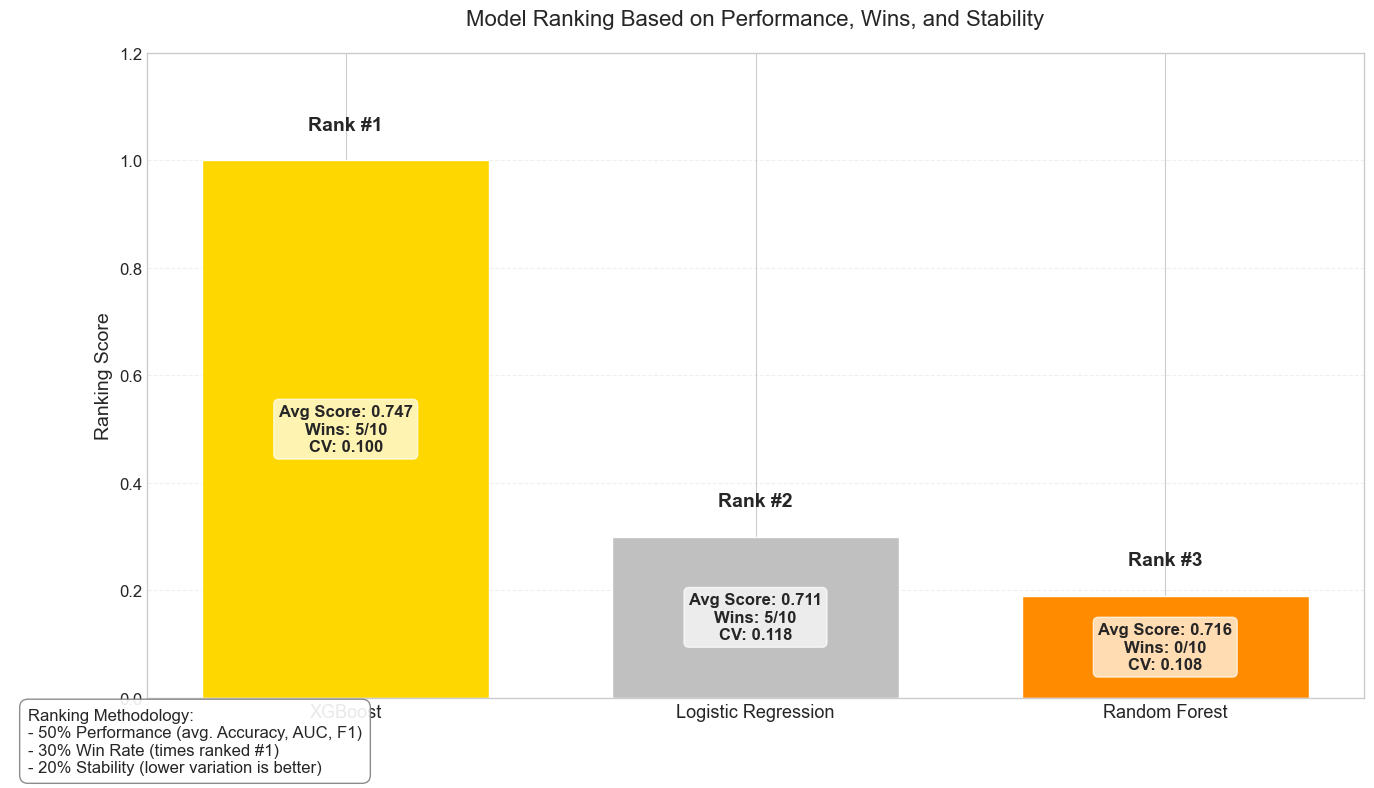

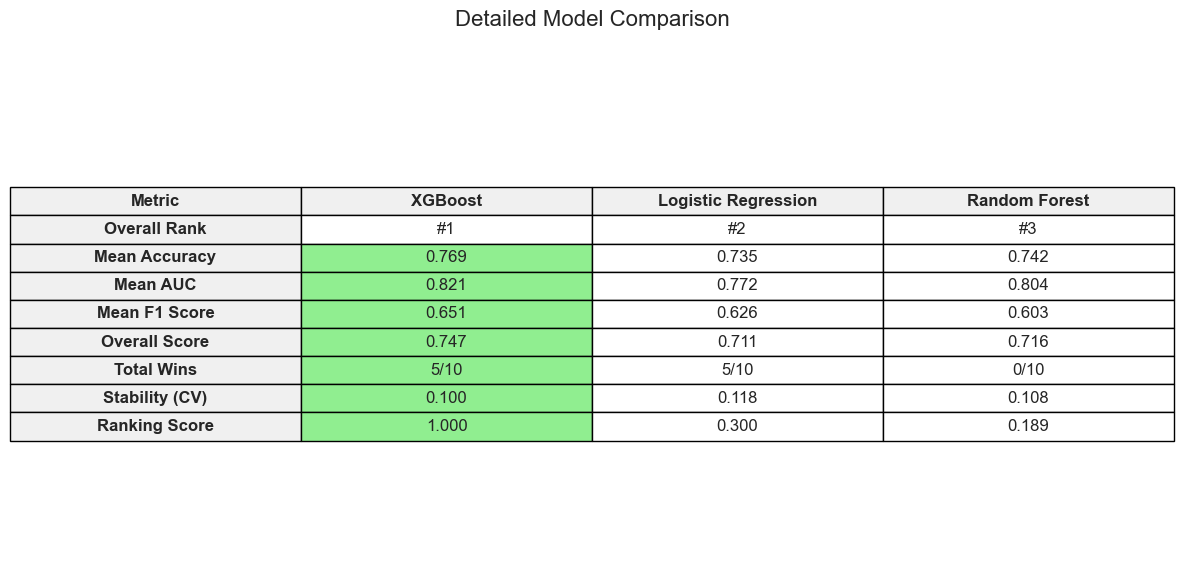

,Rank,Model_Name,Overall_Score,Overall_Wins,Overall_CV,Ranking_Score
0,1,XGBoost,0.746896,5,0.100375,1.00000
1,2,Logistic Regression,0.710829,5,0.117575,0.30000
2,3,Random Forest,0.716111,0,0.107606,0.18914


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# Calculate mean performance metrics for each model
mean_metrics = merged_df.groupby('Model')[['Accuracy', 'AUC', 'F1_Score']].mean().reset_index()

# Calculate overall mean score across all metrics
mean_metrics['Overall_Score'] = mean_metrics[['Accuracy', 'AUC', 'F1_Score']].mean(axis=1)

# Count wins per experiment
wins = {'Accuracy': [], 'AUC': [], 'F1_Score': [], 'Overall': []}

for seed in merged_df['Seed'].unique():
    experiment_data = merged_df[merged_df['Seed'] == seed]
    
    # Find winners for each metric
    for metric in ['Accuracy', 'AUC', 'F1_Score']:
        winner = experiment_data.loc[experiment_data[metric].idxmax()]['Model']
        wins[metric].append(winner)
    
    # Calculate overall winner based on average of all metrics
    avg_scores = experiment_data.groupby('Model')[['Accuracy', 'AUC', 'F1_Score']].mean().mean(axis=1)
    overall_winner = avg_scores.idxmax()
    wins['Overall'].append(overall_winner)

# Convert win counts to a DataFrame
win_counts = pd.DataFrame({
    'Model': merged_df['Model'].unique(),
    'Accuracy_Wins': [wins['Accuracy'].count(model) for model in merged_df['Model'].unique()],
    'AUC_Wins': [wins['AUC'].count(model) for model in merged_df['Model'].unique()],
    'F1_Score_Wins': [wins['F1_Score'].count(model) for model in merged_df['Model'].unique()],
    'Overall_Wins': [wins['Overall'].count(model) for model in merged_df['Model'].unique()]
})

# Calculate stability metrics (coefficient of variation - lower is better)
cv_metrics = merged_df.groupby('Model').agg({
    'Accuracy': lambda x: np.std(x) / np.mean(x),
    'AUC': lambda x: np.std(x) / np.mean(x),
    'F1_Score': lambda x: np.std(x) / np.mean(x)
}).reset_index()

cv_metrics.columns = ['Model', 'Accuracy_CV', 'AUC_CV', 'F1_Score_CV']
cv_metrics['Overall_CV'] = cv_metrics[['Accuracy_CV', 'AUC_CV', 'F1_Score_CV']].mean(axis=1)

# Merge all metrics into a final ranking dataframe
ranking_df = pd.merge(mean_metrics, win_counts, on='Model')
ranking_df = pd.merge(ranking_df, cv_metrics, on='Model')

# Define metrics and weights for ranking
metrics = ['Overall_Score', 'Overall_Wins', 'Overall_CV']
weights = [0.5, 0.3, 0.2]  # 50% importance on performance, 30% on wins, 20% on stability

# Normalize each metric to 0-1 scale and apply weights
normalized = pd.DataFrame()
for metric in metrics:
    if 'CV' in metric:  # For CV metrics, lower is better
        normalized[metric] = (ranking_df[metric].max() - ranking_df[metric]) / (ranking_df[metric].max() - ranking_df[metric].min())
    else:  # For other metrics, higher is better
        normalized[metric] = (ranking_df[metric] - ranking_df[metric].min()) / (ranking_df[metric].max() - ranking_df[metric].min())

ranking_df['Ranking_Score'] = sum(normalized[metric] * weight for metric, weight in zip(metrics, weights))

# Sort by final ranking score
final_ranking = ranking_df.sort_values('Ranking_Score', ascending=False).reset_index(drop=True)

# Add a rank column
final_ranking['Rank'] = range(1, len(final_ranking) + 1)

# Create nice model names for display
model_name_map = {
    'logisticregression': 'Logistic Regression',
    'xgboost': 'XGBoost',
    'randomforest': 'Random Forest'
}

display_ranking = final_ranking.copy()
display_ranking['Model_Name'] = display_ranking['Model'].map(model_name_map)

# Create the ranking visualization with better spacing
plt.figure(figsize=(14, 8))

# Use different colors for different ranks
colors = ['gold', 'silver', 'darkorange']
bar_width = 0.7
bar_positions = np.arange(len(display_ranking))

# Create bars
bars = plt.bar(bar_positions, display_ranking['Ranking_Score'], width=bar_width, color=colors)

# Add rank labels at the top of the bars
for i, (bar, rank) in enumerate(zip(bars, display_ranking['Rank'])):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, 
             f"Rank #{rank}", ha='center', va='bottom', fontweight='bold', fontsize=14)

# Add the model name on the x-axis
plt.xticks(bar_positions, display_ranking['Model_Name'], fontsize=13)

# Add key metrics inside bars with better spacing
for i, row in display_ranking.iterrows():
    bar_height = bars[i].get_height()
    # Position the text in the middle of each bar with good spacing
    y_pos = bar_height / 2
    
    # Add a white background behind the text for better readability
    plt.text(i, y_pos, 
             f"Avg Score: {row['Overall_Score']:.3f}\nWins: {row['Overall_Wins']}/{len(wins['Overall'])}\nCV: {row['Overall_CV']:.3f}", 
             ha='center', va='center', fontweight='bold', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'))

# Customize the plot
plt.title('Model Ranking Based on Performance, Wins, and Stability', fontsize=16, pad=20)
plt.ylabel('Ranking Score', fontsize=14)
plt.ylim(0, 1.2)  # Increase the y limit to make room for labels
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Create a text box explaining the ranking methodology
explanation = """Ranking Methodology:
- 50% Performance (avg. Accuracy, AUC, F1)
- 30% Win Rate (times ranked #1)
- 20% Stability (lower variation is better)"""

# Position the methodology box in the bottom left with some padding
plt.annotate(explanation, xy=(0.02, 0.02), xycoords='figure fraction', 
             bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.9, ec="gray"),
             fontsize=12)

plt.tight_layout()
plt.savefig('model_ranking.png', dpi=300, bbox_inches='tight')
plt.show()

# Generate a more detailed comparison table
plt.figure(figsize=(12, 6))
ax = plt.subplot(111, frame_on=False)
plt.axis('off')

# Prepare the table data
table_data = [
    ['Metric'] + list(display_ranking['Model_Name']),
    ['Overall Rank'] + [f"#{int(r)}" for r in display_ranking['Rank']],
    ['Mean Accuracy'] + [f"{a:.3f}" for a in display_ranking['Accuracy']],
    ['Mean AUC'] + [f"{a:.3f}" for a in display_ranking['AUC']],
    ['Mean F1 Score'] + [f"{f:.3f}" for f in display_ranking['F1_Score']],
    ['Overall Score'] + [f"{s:.3f}" for s in display_ranking['Overall_Score']],
    ['Total Wins'] + [f"{w}/{len(wins['Overall'])}" for w in display_ranking['Overall_Wins']],
    ['Stability (CV)'] + [f"{cv:.3f}" for cv in display_ranking['Overall_CV']],
    ['Ranking Score'] + [f"{s:.3f}" for s in display_ranking['Ranking_Score']]
]

# Create the table with colors indicating performance
table = plt.table(cellText=table_data, cellLoc='center', loc='center', cellColours=None)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Adjust table size

# Highlight the header row and column
for i in range(len(table_data[0])):
    table[(0, i)].set_facecolor('#f0f0f0')
    table[(0, i)].set_text_props(fontweight='bold')
    
for i in range(1, len(table_data)):
    table[(i, 0)].set_facecolor('#f0f0f0')
    table[(i, 0)].set_text_props(fontweight='bold')

# Highlight the best values in each row
for i in range(2, len(table_data)):
    if i == 7:  # For CV (stability), lower is better
        best_idx = np.argmin([float(val.split()[0]) for val in table_data[i][1:]])
    else:
        best_idx = np.argmax([float(val.split('/')[0]) if '/' in val else float(val[1:]) if val.startswith('#') else float(val) for val in table_data[i][1:]])
    
    table[(i, best_idx + 1)].set_facecolor('lightgreen')

plt.title('Detailed Model Comparison', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('model_comparison_table.png', dpi=300, bbox_inches='tight')
plt.show()

# Return the ranking results
display_ranking[['Rank', 'Model_Name', 'Overall_Score', 'Overall_Wins', 'Overall_CV', 'Ranking_Score']]

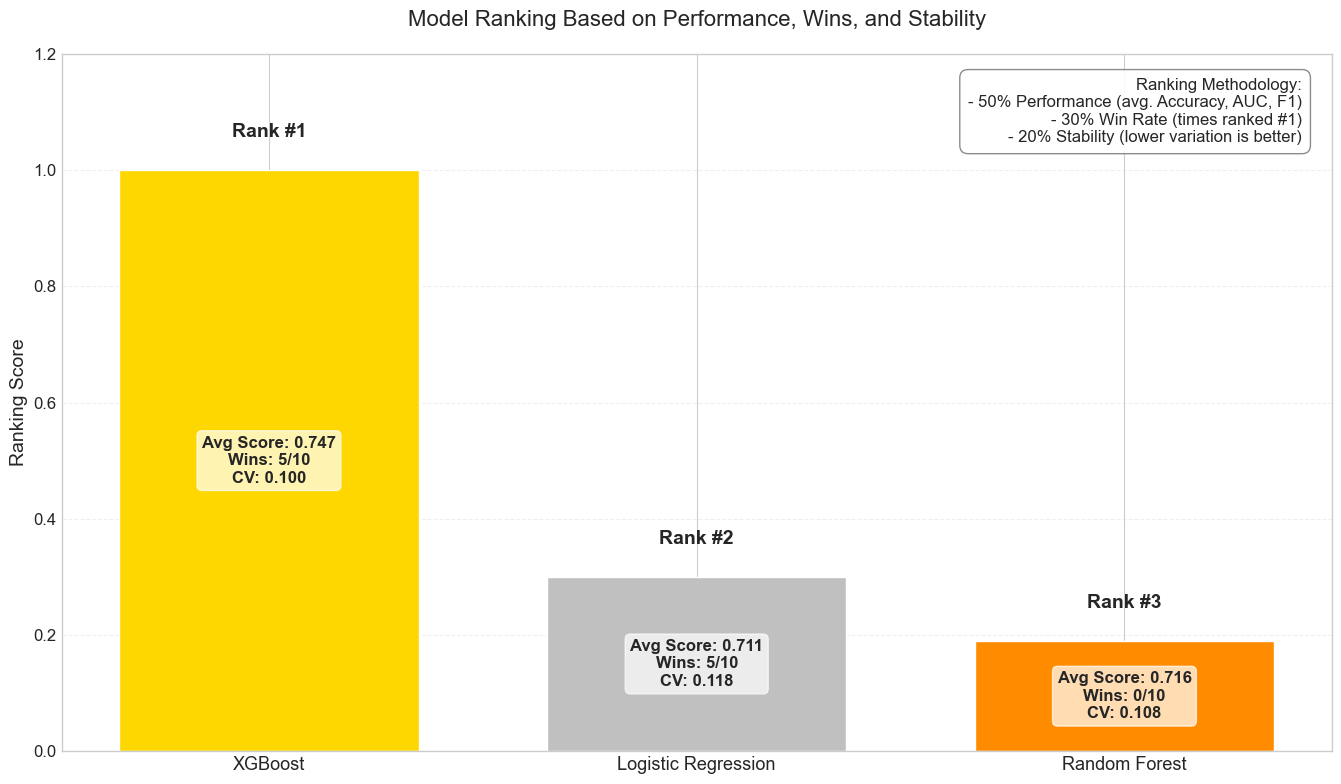


=== MODEL RANKING FROM BEST TO WEAKEST ===

1. XGBoost
   Overall Score: 0.747
   Performance: Accuracy = 0.769, AUC = 0.821, F1 Score = 0.651
   Wins: 5 out of 10 experiments
   Stability: Coefficient of Variation = 0.100

2. Logistic Regression
   Overall Score: 0.711
   Performance: Accuracy = 0.735, AUC = 0.772, F1 Score = 0.626
   Wins: 5 out of 10 experiments
   Stability: Coefficient of Variation = 0.118

3. Random Forest
   Overall Score: 0.716
   Performance: Accuracy = 0.742, AUC = 0.804, F1 Score = 0.603
   Wins: 0 out of 10 experiments
   Stability: Coefficient of Variation = 0.108



,Rank,Model,Overall Score,Accuracy,AUC,F1 Score,Win Count,Stability (CV),Final Score
0,1,XGBoost,0.747,0.769,0.821,0.651,5,0.100,1.000
1,2,Logistic Regression,0.711,0.735,0.772,0.626,5,0.118,0.300
2,3,Random Forest,0.716,0.742,0.804,0.603,0,0.108,0.189


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

# Set the style for all plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# Calculate mean performance metrics for each model
mean_metrics = merged_df.groupby('Model')[['Accuracy', 'AUC', 'F1_Score']].mean().reset_index()

# Calculate overall mean score across all metrics
mean_metrics['Overall_Score'] = mean_metrics[['Accuracy', 'AUC', 'F1_Score']].mean(axis=1)

# Calculate win counts for each model
wins = {'Accuracy': [], 'AUC': [], 'F1_Score': [], 'Overall': []}

# Count wins per experiment
for seed in merged_df['Seed'].unique():
    experiment_data = merged_df[merged_df['Seed'] == seed]
    
    # Find winners for each metric
    for metric in ['Accuracy', 'AUC', 'F1_Score']:
        winner = experiment_data.loc[experiment_data[metric].idxmax()]['Model']
        wins[metric].append(winner)
    
    # Calculate overall winner based on average of all metrics
    avg_scores = experiment_data.groupby('Model')[['Accuracy', 'AUC', 'F1_Score']].mean().mean(axis=1)
    overall_winner = avg_scores.idxmax()
    wins['Overall'].append(overall_winner)

# Convert win counts to a DataFrame
win_counts = pd.DataFrame({
    'Model': merged_df['Model'].unique(),
    'Accuracy_Wins': [wins['Accuracy'].count(model) for model in merged_df['Model'].unique()],
    'AUC_Wins': [wins['AUC'].count(model) for model in merged_df['Model'].unique()],
    'F1_Score_Wins': [wins['F1_Score'].count(model) for model in merged_df['Model'].unique()],
    'Overall_Wins': [wins['Overall'].count(model) for model in merged_df['Model'].unique()]
})

# Calculate stability metrics (coefficient of variation - lower is better)
cv_metrics = merged_df.groupby('Model').agg({
    'Accuracy': lambda x: np.std(x) / np.mean(x),
    'AUC': lambda x: np.std(x) / np.mean(x),
    'F1_Score': lambda x: np.std(x) / np.mean(x)
}).reset_index()

cv_metrics.columns = ['Model', 'Accuracy_CV', 'AUC_CV', 'F1_Score_CV']
cv_metrics['Overall_CV'] = cv_metrics[['Accuracy_CV', 'AUC_CV', 'F1_Score_CV']].mean(axis=1)

# Merge all metrics into a final ranking dataframe
ranking_df = pd.merge(mean_metrics, win_counts, on='Model')
ranking_df = pd.merge(ranking_df, cv_metrics, on='Model')

# Define metrics and weights for ranking
metrics = ['Overall_Score', 'Overall_Wins', 'Overall_CV']
weights = [0.5, 0.3, 0.2]  # 50% importance on performance, 30% on wins, 20% on stability

# Normalize each metric to 0-1 scale and apply weights
normalized = pd.DataFrame()
for metric in metrics:
    if 'CV' in metric:  # For CV metrics, lower is better
        normalized[metric] = (ranking_df[metric].max() - ranking_df[metric]) / (ranking_df[metric].max() - ranking_df[metric].min())
    else:  # For other metrics, higher is better
        normalized[metric] = (ranking_df[metric] - ranking_df[metric].min()) / (ranking_df[metric].max() - ranking_df[metric].min())

ranking_df['Ranking_Score'] = sum(normalized[metric] * weight for metric, weight in zip(metrics, weights))

# Sort by final ranking score
final_ranking = ranking_df.sort_values('Ranking_Score', ascending=False).reset_index(drop=True)

# Add a rank column
final_ranking['Rank'] = range(1, len(final_ranking) + 1)

# Create nice model names for display
model_name_map = {
    'logisticregression': 'Logistic Regression',
    'xgboost': 'XGBoost',
    'randomforest': 'Random Forest'
}

display_ranking = final_ranking.copy()
display_ranking['Model_Name'] = display_ranking['Model'].map(model_name_map)

# Create the ranking visualization with better spacing
plt.figure(figsize=(14, 8))

# Use different colors for different ranks
colors = ['gold', 'silver', 'darkorange']
bar_width = 0.7
bar_positions = np.arange(len(display_ranking))

# Create bars
bars = plt.bar(bar_positions, display_ranking['Ranking_Score'], width=bar_width, color=colors)

# Add rank labels at the top of the bars
for i, (bar, rank) in enumerate(zip(bars, display_ranking['Rank'])):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, 
             f"Rank #{rank}", ha='center', va='bottom', fontweight='bold', fontsize=14)

# Add the model name on the x-axis
plt.xticks(bar_positions, display_ranking['Model_Name'], fontsize=13)

# Add key metrics inside bars with better spacing
for i, row in display_ranking.iterrows():
    bar_height = bars[i].get_height()
    # Position the text in the middle of each bar with good spacing
    y_pos = bar_height / 2
    
    # Add a white background behind the text for better readability
    plt.text(i, y_pos, 
             f"Avg Score: {row['Overall_Score']:.3f}\nWins: {row['Overall_Wins']}/{len(wins['Overall'])}\nCV: {row['Overall_CV']:.3f}", 
             ha='center', va='center', fontweight='bold', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'))

# Customize the plot
plt.title('Model Ranking Based on Performance, Wins, and Stability', fontsize=16, pad=20)
plt.ylabel('Ranking Score', fontsize=14)
plt.ylim(0, 1.2)  # Increase the y limit to make room for labels
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Create a text box explaining the ranking methodology
explanation = """Ranking Methodology:
- 50% Performance (avg. Accuracy, AUC, F1)
- 30% Win Rate (times ranked #1)
- 20% Stability (lower variation is better)"""

# Position the methodology box in the upper right corner with some padding
plt.annotate(explanation, xy=(0.94, 0.9), xycoords='figure fraction', 
             xytext=(-10, -10), textcoords='offset points',
             bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.9, ec="gray"),
             fontsize=12, ha='right', va='top')

plt.tight_layout()
plt.savefig('model_ranking.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a detailed ranking table
ranking_table = pd.DataFrame({
    'Rank': display_ranking['Rank'],
    'Model': display_ranking['Model_Name'],
    'Overall Score': display_ranking['Overall_Score'].round(3),
    'Accuracy': display_ranking['Accuracy'].round(3),
    'AUC': display_ranking['AUC'].round(3),
    'F1 Score': display_ranking['F1_Score'].round(3),
    'Win Count': display_ranking['Overall_Wins'],
    'Stability (CV)': display_ranking['Overall_CV'].round(3),
    'Final Score': display_ranking['Ranking_Score'].round(3)
})

print("\n=== MODEL RANKING FROM BEST TO WEAKEST ===\n")
for i, row in ranking_table.iterrows():
    print(f"{int(row['Rank'])}. {row['Model']}")
    print(f"   Overall Score: {row['Overall Score']:.3f}")
    print(f"   Performance: Accuracy = {row['Accuracy']:.3f}, AUC = {row['AUC']:.3f}, F1 Score = {row['F1 Score']:.3f}")
    print(f"   Wins: {row['Win Count']} out of {len(wins['Overall'])} experiments")
    print(f"   Stability: Coefficient of Variation = {row['Stability (CV)']:.3f}")
    print()

# Return the ranking table
display(ranking_table)

In [38]:
# Define our models
models = ['logisticregression', 'xgboost', 'randomforest']
model_name_map = {
    'logisticregression': 'Logistic Regression',
    'xgboost': 'XGBoost',
    'randomforest': 'Random Forest'
}

In [40]:
# Add readable model names
merged_df['Model_Name'] = merged_df['Model'].map(model_name_map)
merged_df

,Model,Seed,Experiment_Number,Accuracy,AUC,F1_Score,Model_Name
0,logisticregression,315491657,1,0.743590,0.776389,0.666667,Logistic Regression
1,xgboost,315491657,1,0.820513,0.912500,0.781250,XGBoost
2,randomforest,315491657,1,0.807692,0.869444,0.782609,Random Forest
3,logisticregression,135304577,2,0.604396,0.603636,0.437500,Logistic Regression
4,xgboost,135304577,2,0.758242,0.829091,0.607143,XGBoost
5,randomforest,135304577,2,0.725275,0.843030,0.590164,Random Forest
6,logisticregression,1572185508,3,0.822222,0.860082,0.733333,Logistic Regression
7,xgboost,1572185508,3,0.788889,0.871252,0.558140,XGBoost
8,randomforest,1572185508,3,0.777778,0.867725,0.583333,Random Forest
9,logisticregression,1029933563,4,0.770115,0.849607,0.655172,Logistic Regression


In [42]:
# Define metrics for visualization
metrics = ['Accuracy', 'AUC', 'F1_Score']

In [44]:
# %% [markdown]
# ## Basic Statistics
# 
# Let's examine basic statistics for each model across all metrics.

# %%
# Calculate basic statistics for each model and metric
model_stats = merged_df.groupby('Model_Name')[metrics].agg(['mean', 'std', 'min', 'max']).round(4)
print("\nPerformance Statistics by Model:")
display(model_stats)


Performance Statistics by Model:


Accuracy                             AUC                  \
                        mean     std     min     max    mean     std     min   
Model_Name                                                                     
Logistic Regression   0.7354  0.0667  0.6044  0.8222  0.7715  0.1001  0.6036   
Random Forest         0.7418  0.0659  0.6081  0.8133  0.8036  0.0866  0.6199   
XGBoost               0.7687  0.0689  0.5946  0.8333  0.8211  0.0610  0.7172   

                            F1_Score                          
                        max     mean     std     min     max  
Model_Name                                                    
Logistic Regression  0.9101   0.6256  0.0947  0.4375  0.7333  
Random Forest        0.8724   0.6030  0.0867  0.4444  0.7826  
XGBoost              0.9125   0.6509  0.0999  0.5161  0.7812

In [46]:
# Calculate overall average performance
overall_performance = merged_df.groupby('Model_Name')[metrics].mean().mean(axis=1).sort_values(ascending=False)
print("\nOverall Average Performance (across all metrics):")
for model, score in overall_performance.items():
    print(f"{model}: {score:.4f}")


Overall Average Performance (across all metrics):
XGBoost: 0.7469
Random Forest: 0.7161
Logistic Regression: 0.7108


In [48]:
# %% [markdown]
# ## Win Count Analysis
# 
# Let's count how many times each model performed best across experiments.

# %%
# Count how many times each model was the best for each metric and overall
win_counts = {model: {metric: 0 for metric in metrics + ['Overall']} 
              for model in merged_df['Model_Name'].unique()}

# Count wins
for exp_num in merged_df['Experiment_Number'].unique():
    for seed in merged_df['Seed'].unique():
        group = merged_df[(merged_df['Experiment_Number'] == exp_num) & (merged_df['Seed'] == seed)]
        
        # Skip if no data for this combination
        if len(group) == 0:
            continue
            
        # For each metric, find the winning model
        for metric in metrics:
            best_model = group.loc[group[metric].idxmax()]['Model_Name']
            win_counts[best_model][metric] += 1
        
        # Calculate overall win (model with highest average across metrics)
        avg_scores = group.groupby('Model_Name')[metrics].mean().mean(axis=1)
        overall_best = avg_scores.idxmax()
        win_counts[overall_best]['Overall'] += 1

# Display win counts
win_df = pd.DataFrame([
    {'Model': model, 'Metric': metric, 'Wins': count}
    for model in win_counts
    for metric, count in win_counts[model].items()
])

win_pivot = win_df.pivot(index='Model', columns='Metric', values='Wins')
print("\nWin Count Analysis (times each model performed best):")
display(win_pivot)


Win Count Analysis (times each model performed best):


Metric,AUC,Accuracy,F1_Score,Overall
Model,,,,
Logistic Regression,3,4,4,5
Random Forest,1,1,1,0
XGBoost,6,5,5,5


In [50]:
# %% [markdown]
# ## Stability Analysis
# 
# Let's analyze the stability of each model's performance using the Coefficient of Variation (CV).

# %%
# Calculate coefficient of variation for each model to assess stability
cv_data = []
for model in merged_df['Model_Name'].unique():
    model_data = merged_df[merged_df['Model_Name'] == model]
    
    for metric in metrics:
        mean = model_data[metric].mean()
        std = model_data[metric].std()
        cv = (std / mean) * 100  # CV as percentage
        
        cv_data.append({
            'Model': model,
            'Metric': metric,
            'CV (%)': cv
        })

cv_df = pd.DataFrame(cv_data)
cv_pivot = cv_df.pivot(index='Model', columns='Metric', values='CV (%)')
cv_pivot['Average CV'] = cv_pivot.mean(axis=1)

print("\nStability Analysis - Coefficient of Variation (lower is better):")
display(cv_pivot.round(2))


Stability Analysis - Coefficient of Variation (lower is better):


Metric,AUC,Accuracy,F1_Score,Average CV
Model,,,,
Logistic Regression,12.98,9.07,15.13,12.39
Random Forest,10.77,8.88,14.38,11.34
XGBoost,7.43,8.96,15.35,10.58


In [52]:
# %% [markdown]
# ## Final Model Ranking
# 
# Now, let's create a comprehensive ranking of models based on performance, win rate, and stability.

# %%
# Calculate mean performance metrics for each model
mean_metrics = merged_df.groupby('Model_Name')[metrics].mean().reset_index()

# Calculate overall mean score across all metrics
mean_metrics['Overall_Score'] = mean_metrics[metrics].mean(axis=1)

# Count overall wins
overall_wins = {model: win_counts[model]['Overall'] for model in win_counts}
mean_metrics['Win_Count'] = mean_metrics['Model_Name'].map(overall_wins)

# Add stability metrics
mean_cv = cv_df.groupby('Model')['CV (%)'].mean().reset_index()
mean_cv.columns = ['Model_Name', 'Mean_CV']
mean_metrics = pd.merge(mean_metrics, mean_cv, on='Model_Name')

# Define metrics and weights for ranking
weights = {
    'Overall_Score': 0.5,   # 50% performance
    'Win_Count': 0.3,       # 30% win rate
    'Mean_CV': 0.2          # 20% stability (inverted since lower is better)
}

# Normalize each metric to 0-1 scale for fair comparison
for col in ['Overall_Score', 'Win_Count']:
    min_val = mean_metrics[col].min()
    max_val = mean_metrics[col].max() 
    range_val = max_val - min_val
    mean_metrics[f'{col}_Norm'] = (mean_metrics[col] - min_val) / range_val if range_val > 0 else 0.5

# For CV, lower is better, so invert the normalization
min_cv = mean_metrics['Mean_CV'].min()
max_cv = mean_metrics['Mean_CV'].max()
range_cv = max_cv - min_cv
mean_metrics['Mean_CV_Norm'] = (max_cv - mean_metrics['Mean_CV']) / range_cv if range_cv > 0 else 0.5

# Calculate final weighted score
mean_metrics['Ranking_Score'] = (
    weights['Overall_Score'] * mean_metrics['Overall_Score_Norm'] + 
    weights['Win_Count'] * mean_metrics['Win_Count_Norm'] + 
    weights['Mean_CV'] * mean_metrics['Mean_CV_Norm']
)

# Sort and add rank
final_ranking = mean_metrics.sort_values('Ranking_Score', ascending=False).reset_index(drop=True)
final_ranking['Rank'] = range(1, len(final_ranking) + 1)

# Display the final ranking
print("\nFINAL MODEL RANKING (BEST TO WORST)")
display(final_ranking[['Rank', 'Model_Name', 'Overall_Score', 'Win_Count', 'Mean_CV', 'Ranking_Score']])


FINAL MODEL RANKING (BEST TO WORST)


,Rank,Model_Name,Overall_Score,Win_Count,Mean_CV,Ranking_Score
0,1,XGBoost,0.746896,5,10.580501,1.00000
1,2,Logistic Regression,0.710829,5,12.393505,0.30000
2,3,Random Forest,0.716111,0,11.342662,0.18914


In [54]:
# Print detailed ranking
print("\nDetailed Model Ranking:")
for i, row in final_ranking.iterrows():
    print(f"\n{int(row['Rank'])}. {row['Model_Name']}")
    print(f"   Overall Performance: {row['Overall_Score']:.4f}")
    print(f"   Accuracy: {row['Accuracy']:.4f}, AUC: {row['AUC']:.4f}, F1 Score: {row['F1_Score']:.4f}")
    print(f"   Win Count: {int(row['Win_Count'])} out of {experiments*seeds} experiments")
    print(f"   Stability (Coefficient of Variation): {row['Mean_CV']:.2f}% (lower is better)")
    print(f"   Final Ranking Score: {row['Ranking_Score']:.4f}")


Detailed Model Ranking:

1. XGBoost
   Overall Performance: 0.7469
   Accuracy: 0.7687, AUC: 0.8211, F1 Score: 0.6509
   Win Count: 5 out of 30 experiments
   Stability (Coefficient of Variation): 10.58% (lower is better)
   Final Ranking Score: 1.0000

2. Logistic Regression
   Overall Performance: 0.7108
   Accuracy: 0.7354, AUC: 0.7715, F1 Score: 0.6256
   Win Count: 5 out of 30 experiments
   Stability (Coefficient of Variation): 12.39% (lower is better)
   Final Ranking Score: 0.3000

3. Random Forest
   Overall Performance: 0.7161
   Accuracy: 0.7418, AUC: 0.8036, F1 Score: 0.6030
   Win Count: 0 out of 30 experiments
   Stability (Coefficient of Variation): 11.34% (lower is better)
   Final Ranking Score: 0.1891


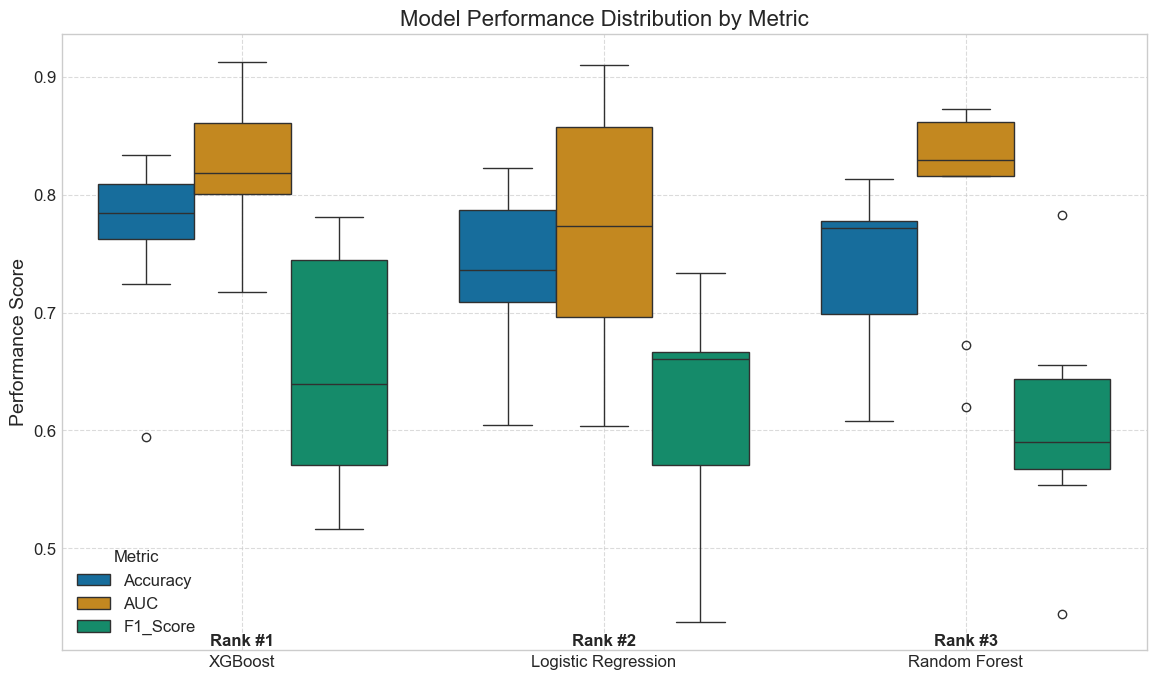

In [56]:
# %% [markdown]
# ## Visualizations
# 
# Now let's create a series of visualizations to better understand the model comparison results.

# %% [markdown]
# ### 1. Overall Performance Distribution

# %%
# Create a figure for overall performance boxplots
plt.figure(figsize=(14, 8))
melted_data = pd.melt(merged_df, id_vars=['Model_Name'], value_vars=metrics, 
                     var_name='Metric', value_name='Value')

# Create box plots
ax = sns.boxplot(x='Model_Name', y='Value', hue='Metric', data=melted_data,
                order=final_ranking['Model_Name'])

# Add ranking information
for i, model in enumerate(final_ranking['Model_Name']):
    rank = final_ranking[final_ranking['Model_Name'] == model]['Rank'].values[0]
    plt.text(i, melted_data['Value'].min() - 0.02, f"Rank #{rank}", 
             ha='center', fontweight='bold')

# Customize plot
plt.title('Model Performance Distribution by Metric', fontsize=16)
plt.xlabel('')
plt.ylabel('Performance Score', fontsize=14)
plt.legend(title='Metric')
plt.grid(True, linestyle='--', alpha=0.7)

# Save the figure
plt.savefig('model_comparison_figures/overall_performance.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1200x800 with 0 Axes>

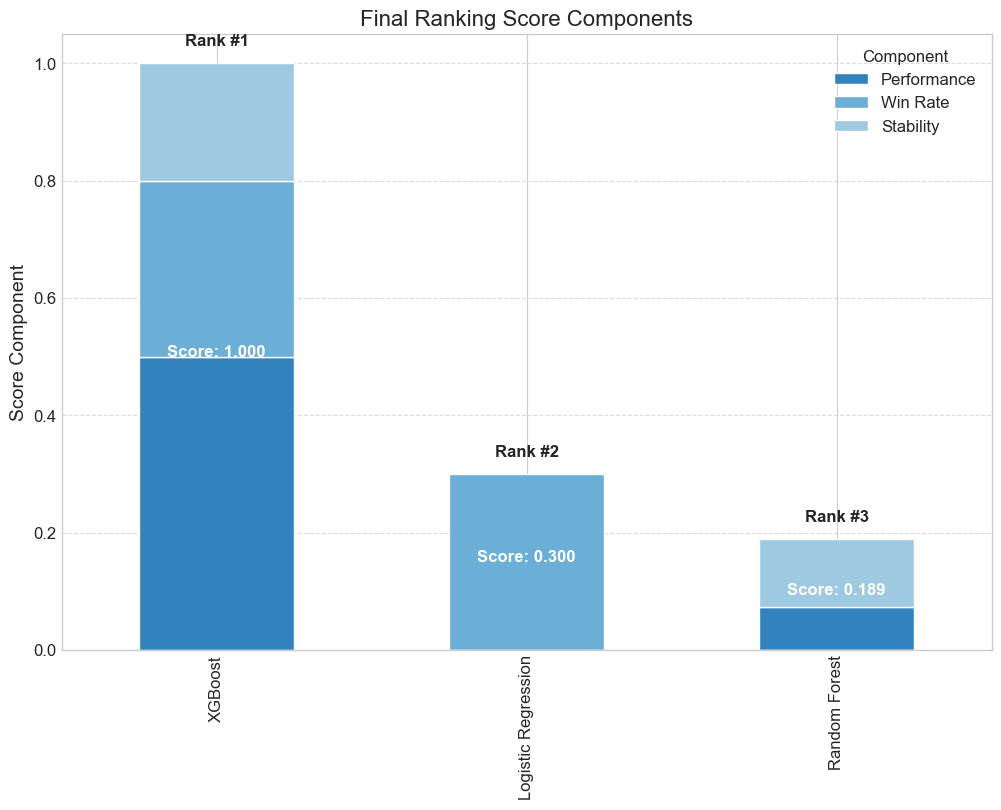

In [58]:
# %% [markdown]
# ### 2. Ranking Score Components

# %%
# Create a figure for ranking score components
plt.figure(figsize=(12, 8))

# Prepare data for stacked bar chart
components = pd.DataFrame({
    'Model': final_ranking['Model_Name'],
    'Performance': weights['Overall_Score'] * final_ranking['Overall_Score_Norm'],
    'Win Rate': weights['Win_Count'] * final_ranking['Win_Count_Norm'],
    'Stability': weights['Mean_CV'] * final_ranking['Mean_CV_Norm'],
    'Total': final_ranking['Ranking_Score']
})

# Sort by rank
components = components.sort_values('Total', ascending=False)

# Create stacked bar chart
ax = components.plot(x='Model', y=['Performance', 'Win Rate', 'Stability'], 
                    kind='bar', stacked=True, figsize=(12, 8), 
                    color=['#3182bd', '#6baed6', '#9ecae1'])

# Add total score and rank
for i, (_, row) in enumerate(components.iterrows()):
    rank = final_ranking[final_ranking['Model_Name'] == row['Model']]['Rank'].values[0]
    plt.text(i, row['Total'] + 0.03, f"Rank #{rank}", ha='center', fontweight='bold')
    plt.text(i, row['Total'] / 2, f"Score: {row['Total']:.3f}", ha='center', 
             color='white', fontweight='bold')

plt.title('Final Ranking Score Components', fontsize=16)
plt.xlabel('')
plt.ylabel('Score Component', fontsize=14)
plt.legend(title='Component')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the figure
plt.savefig('model_comparison_figures/ranking_components.png', dpi=300, bbox_inches='tight')
plt.show()

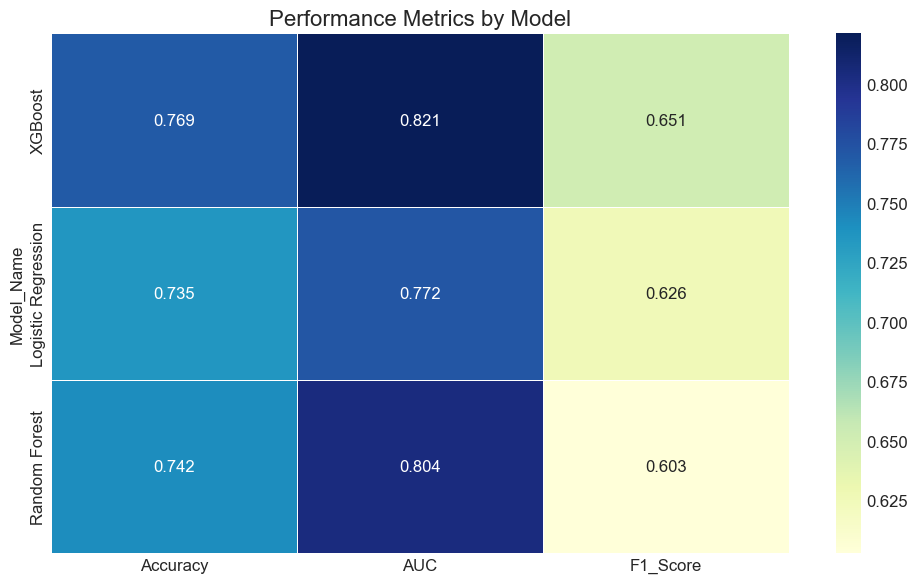

In [60]:
# %% [markdown]
# ### 3. Performance Metrics Heatmap

# %%
# Create a heatmap of performance metrics
plt.figure(figsize=(10, 6))
heatmap_data = final_ranking.sort_values('Rank')[['Model_Name'] + metrics]
heatmap_data = heatmap_data.set_index('Model_Name')

# Create heatmap
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.3f', linewidths=.5)
plt.title('Performance Metrics by Model', fontsize=16)
plt.tight_layout()

# Save the figure
plt.savefig('model_comparison_figures/metrics_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

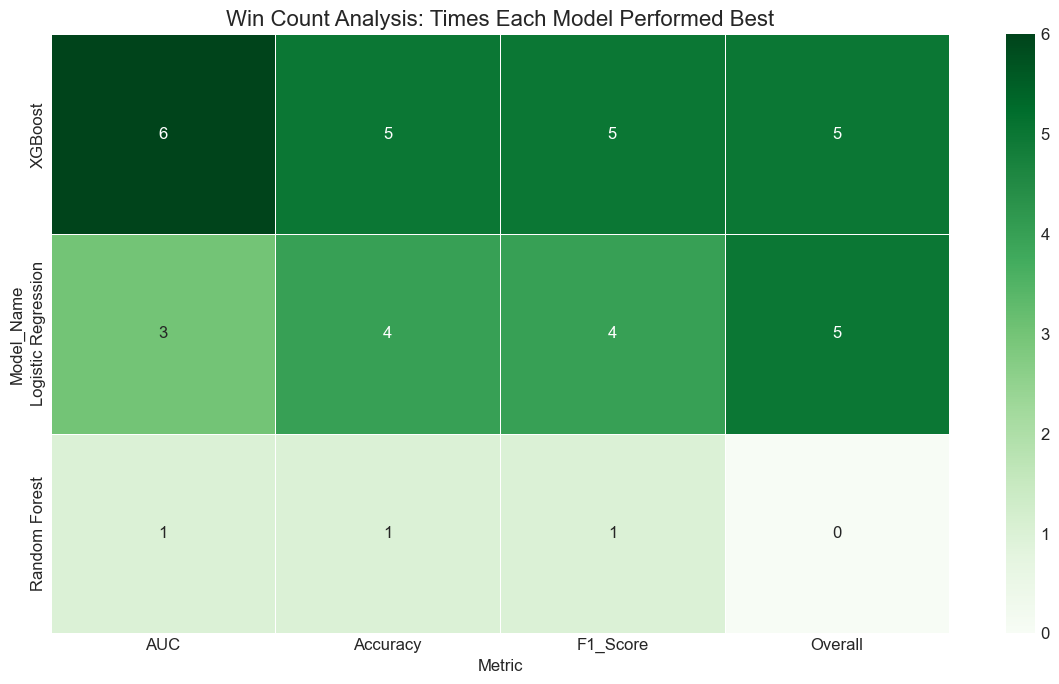

In [62]:
# %% [markdown]
# ### 4. Win Count Analysis Heatmap

# %%
# Create a heatmap of win counts
plt.figure(figsize=(12, 7))
win_df_pivot = win_df.pivot(index='Model', columns='Metric', values='Wins')
win_df_pivot = win_df_pivot.reindex(final_ranking['Model_Name'])

# Create heatmap
sns.heatmap(win_df_pivot, annot=True, cmap='Greens', fmt='d', linewidths=.5)
plt.title('Win Count Analysis: Times Each Model Performed Best', fontsize=16)
plt.tight_layout()

# Save the figure
plt.savefig('model_comparison_figures/win_counts_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

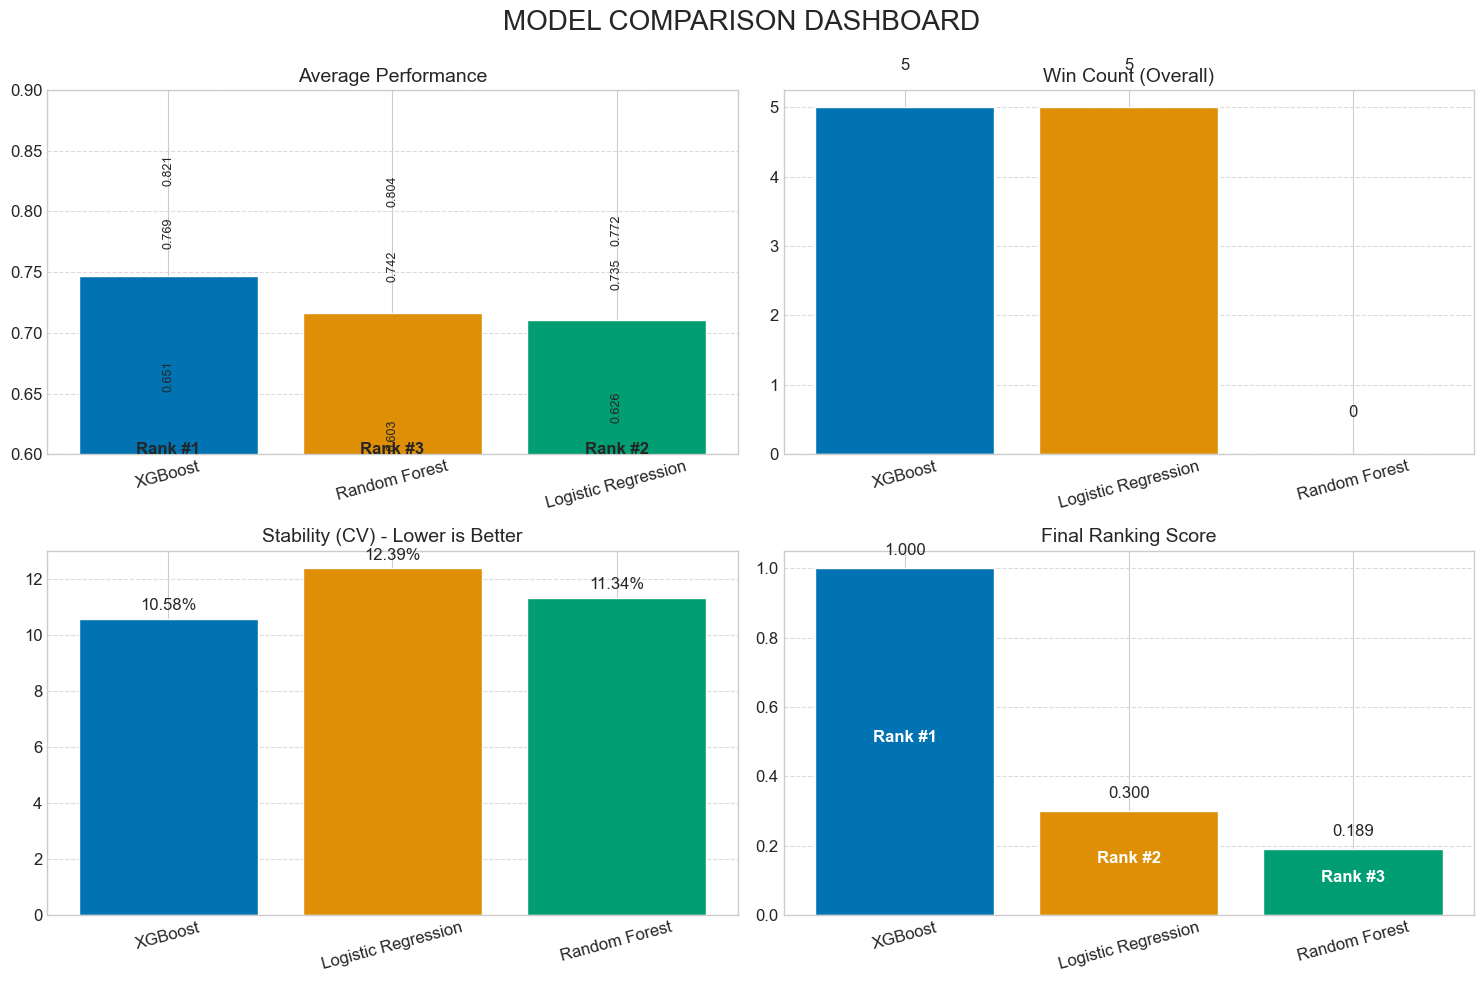

In [64]:
# %% [markdown]
# ### 5. Model Comparison Dashboard

# %%
# Create a comprehensive dashboard
plt.figure(figsize=(15, 10))
plt.suptitle('MODEL COMPARISON DASHBOARD', fontsize=20, y=0.98)

# 1. Overall performance
plt.subplot(2, 2, 1)
model_metrics = merged_df.groupby('Model_Name')[metrics].mean().reset_index()
model_metrics['Average'] = model_metrics[metrics].mean(axis=1)
model_metrics = model_metrics.sort_values('Average', ascending=False)

for i, (_, row) in enumerate(model_metrics.iterrows()):
    plt.bar(i, row['Average'], label=row['Model_Name'])
    
    # Add metric values
    for metric in metrics:
        y_pos = row[metric]
        plt.text(i, y_pos, f"{y_pos:.3f}", ha='center', va='bottom', fontsize=9, rotation=90)
    
    # Add rank
    rank = final_ranking[final_ranking['Model_Name'] == row['Model_Name']]['Rank'].values[0]
    plt.text(i, 0.6, f"Rank #{rank}", ha='center', fontweight='bold')

plt.xticks(range(len(model_metrics)), model_metrics['Model_Name'], rotation=15)
plt.ylim(0.6, 0.9)
plt.title('Average Performance', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 2. Win counts
plt.subplot(2, 2, 2)
for i, model in enumerate(final_ranking['Model_Name']):
    wins = win_counts[model]['Overall']
    plt.bar(i, wins)
    plt.text(i, wins+0.5, f"{wins}", ha='center', va='bottom')

plt.xticks(range(len(final_ranking)), final_ranking['Model_Name'], rotation=15)
plt.title('Win Count (Overall)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 3. Stability
plt.subplot(2, 2, 3)
for i, model in enumerate(final_ranking['Model_Name']):
    cv = final_ranking[final_ranking['Model_Name'] == model]['Mean_CV'].values[0]
    plt.bar(i, cv)
    plt.text(i, cv+0.2, f"{cv:.2f}%", ha='center', va='bottom')

plt.xticks(range(len(final_ranking)), final_ranking['Model_Name'], rotation=15)
plt.title('Stability (CV) - Lower is Better', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 4. Final ranking
plt.subplot(2, 2, 4)
for i, model in enumerate(final_ranking['Model_Name']):
    score = final_ranking[final_ranking['Model_Name'] == model]['Ranking_Score'].values[0]
    plt.bar(i, score)
    plt.text(i, score+0.03, f"{score:.3f}", ha='center', va='bottom')
    
    # Add rank
    rank = final_ranking[final_ranking['Model_Name'] == model]['Rank'].values[0]
    plt.text(i, score/2, f"Rank #{rank}", ha='center', color='white', fontweight='bold')

plt.xticks(range(len(final_ranking)), final_ranking['Model_Name'], rotation=15)
plt.title('Final Ranking Score', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Save the figure
plt.savefig('model_comparison_figures/final_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

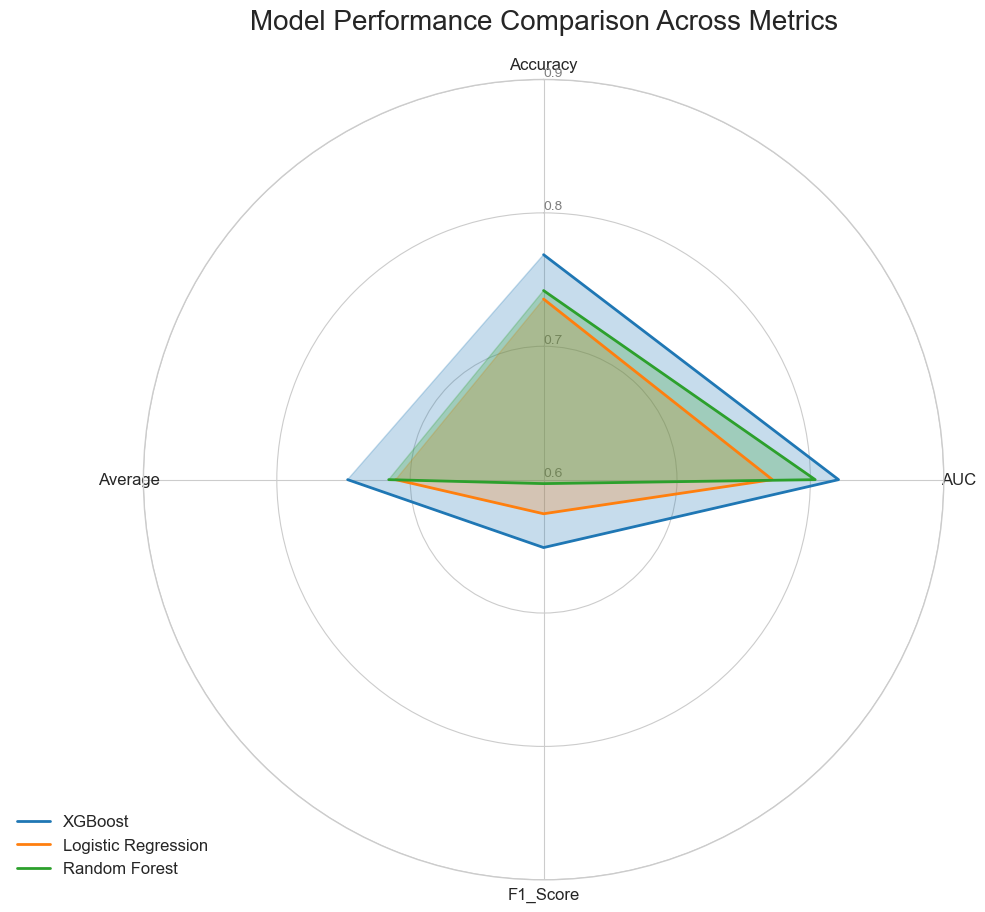

In [66]:
# %% [markdown]
# ## Adjustable Radar Plot (Multi-metric Visualization)
# 
# This additional visualization shows all metrics in a radar/spider plot.

# %%
# Create radar plot for comparing models across all metrics
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def _radar_patch(r, theta):
    '''Helper function for radar plots'''
    # Convert to cartesian coordinates
    vertices = [(x, y) for x, y in zip(np.append(r * np.cos(theta), 0),
                                       np.append(r * np.sin(theta), 0))]
    codes = [Path.MOVETO] + [Path.LINETO] * (len(r) - 1) + [Path.CLOSEPOLY]
    return Path(vertices, codes)

def radar_plot(metrics, values, labels, colors, title='Radar Plot'):
    '''Create a radar plot with customizable axes'''
    # Number of variables
    N = len(metrics)
    
    # Angles for each axis in the plot (divide the circle)
    theta = np.linspace(0, 2*np.pi, N, endpoint=False)
    
    # Draw the plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # Draw axis lines
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw labels for each axis
    plt.xticks(theta, metrics, fontsize=12)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.6, 0.7, 0.8, 0.9], ["0.6", "0.7", "0.8", "0.9"], 
               color="grey", size=10)
    plt.ylim(0.6, 0.9)
    
    # Plot data
    for i, vals in enumerate(values):
        line = ax.plot(theta, vals, linewidth=2, linestyle='solid', label=labels[i], color=colors[i])
        ax.fill(theta, vals, alpha=0.25, color=colors[i])
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    plt.title(title, size=20, pad=20)
    plt.tight_layout()
    
    return fig, ax

# Prepare data for radar plot
metrics_expanded = metrics + ['Average']  # Add average as a metric
model_values = []
model_names = final_ranking['Model_Name'].tolist()

for model in model_names:
    model_data = merged_df[merged_df['Model_Name'] == model]
    avg_metrics = model_data[metrics].mean().to_dict()
    
    # Add the average of all metrics
    avg_metrics['Average'] = sum(avg_metrics.values()) / len(metrics)
    
    # Get values in the same order as metrics_expanded
    values = [avg_metrics[metric] for metric in metrics_expanded]
    model_values.append(values)

# Create radar plot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
fig, ax = radar_plot(metrics_expanded, model_values, model_names, colors, 
                    title='Model Performance Comparison Across Metrics')

# Save radar plot
plt.savefig('model_comparison_figures/radar_plot.png', dpi=300, bbox_inches='tight')
plt.show()

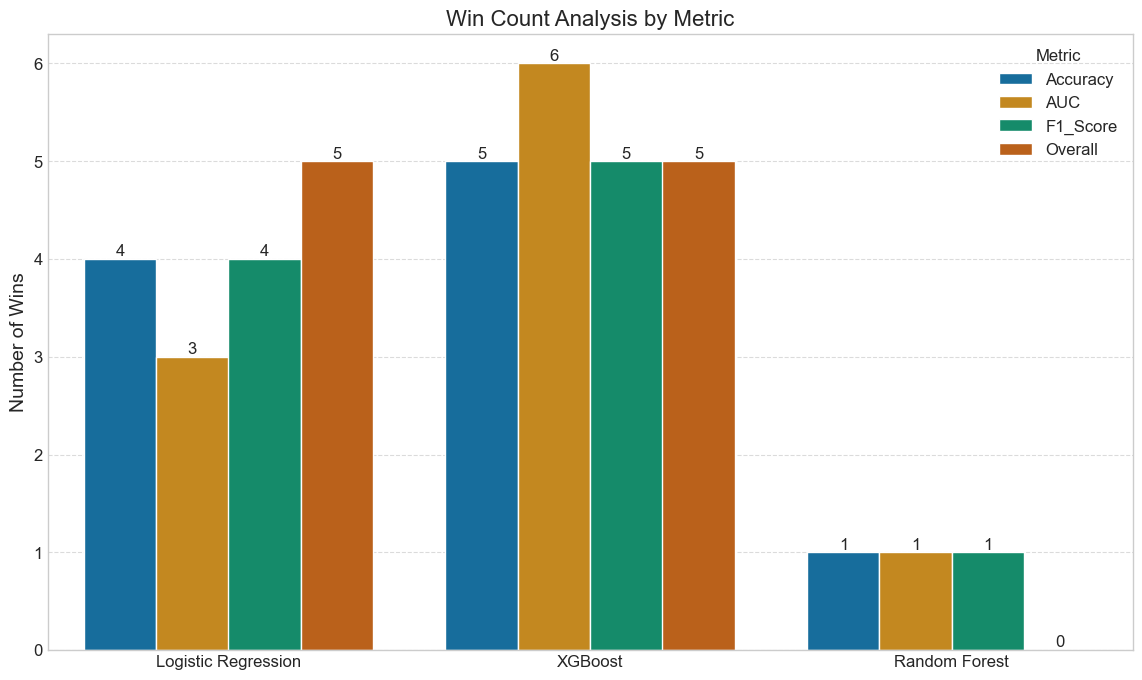

In [68]:
# %% [markdown]
# ## Interactive Win Rate by Metric Bar Chart
# 
# This visualization allows you to compare win rates across different metrics.

# %%
# Create an enhanced win count visualization
win_df = pd.DataFrame([
    {'Model': model, 'Metric': metric, 'Wins': count}
    for model in win_counts
    for metric, count in win_counts[model].items()
])

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Model', y='Wins', hue='Metric', data=win_df)

# Add win count labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Adjust appearance
plt.title('Win Count Analysis by Metric', fontsize=16)
plt.xlabel('')
plt.ylabel('Number of Wins', fontsize=14)
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the figure
plt.savefig('model_comparison_figures/win_count_by_metric.png', dpi=300, bbox_inches='tight')
plt.show()

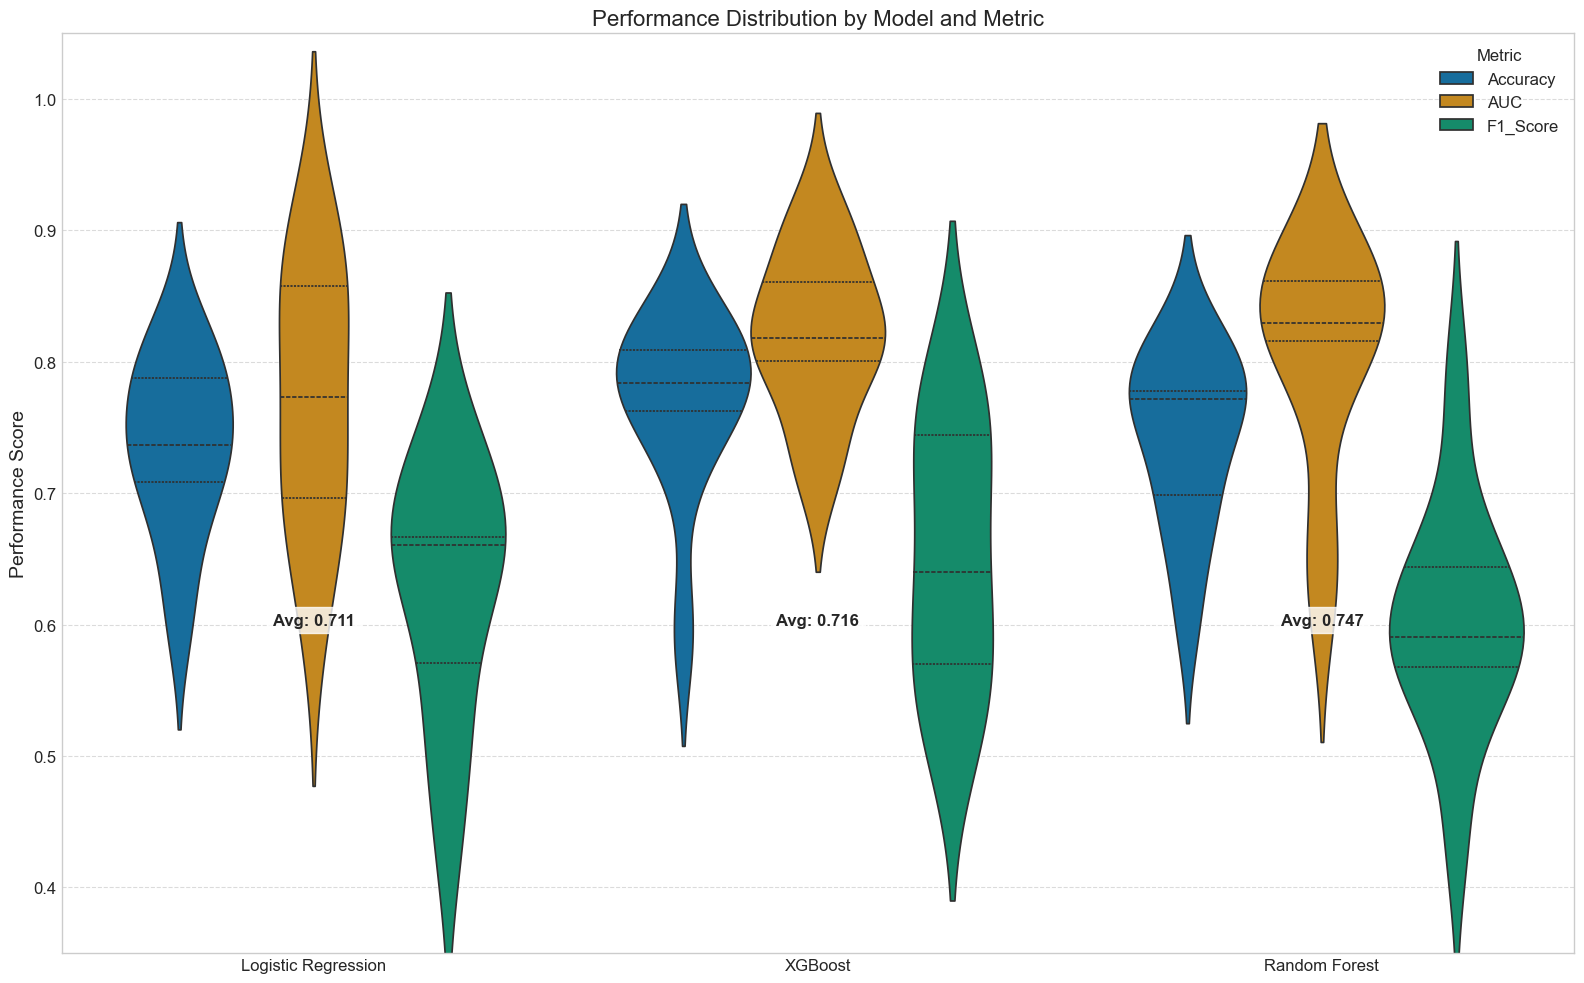

In [78]:
# %% [markdown]
# ## Performance Distribution with Violin Plots
# 
# Violin plots show the full performance distribution for each model and metric.

# %%
# Create violin plots to show the distribution of each metric
plt.figure(figsize=(16, 10))

# Get melted data for plotting
melted_data = pd.melt(merged_df, id_vars=['Model_Name'], 
                     value_vars=metrics, var_name='Metric', value_name='Value')

# Create violin plots
ax = sns.violinplot(x='Model_Name', y='Value', hue='Metric', data=melted_data, 
                   split=False, inner='quartile', palette='colorblind')

# Add average performance as text
model_metric_means = merged_df.groupby('Model_Name')[metrics].mean()
for i, model in enumerate(model_metric_means.index):
    avg = model_metric_means.loc[model].mean()
    plt.text(i, 0.6, f"Avg: {avg:.3f}", ha='center', fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8))

# Customize the plot
plt.title('Performance Distribution by Model and Metric', fontsize=16)
plt.xlabel('')
plt.ylabel('Performance Score', fontsize=14)
plt.ylim(0.35, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save figure
plt.tight_layout()
plt.savefig('model_comparison_figures/performance_distribution_violin.png', dpi=300, bbox_inches='tight')
plt.show()

In [80]:
# %% [markdown]
# ## Statistical Significance Testing
# 
# Let's perform t-tests to determine if the differences between models are statistically significant.

# %%
# Perform statistical significance testing between models
significance_results = []

models = merged_df['Model_Name'].unique()
for metric in metrics:
    for i, model1 in enumerate(models):
        for j, model2 in enumerate(models):
            if i < j:  # Compare each pair once
                data1 = merged_df[merged_df['Model_Name'] == model1][metric]
                data2 = merged_df[merged_df['Model_Name'] == model2][metric]
                
                # Perform t-test
                t_stat, p_val = stats.ttest_ind(data1, data2, equal_var=False)
                
                # Calculate effect size (Cohen's d)
                mean1, mean2 = data1.mean(), data2.mean()
                pooled_std = np.sqrt((data1.std()**2 + data2.std()**2) / 2)
                cohen_d = abs(mean1 - mean2) / pooled_std if pooled_std > 0 else 0
                
                # Store results
                significance_results.append({
                    'Metric': metric,
                    'Model 1': model1,
                    'Model 2': model2,
                    'Model 1 Mean': mean1,
                    'Model 2 Mean': mean2,
                    'Mean Difference': abs(mean1 - mean2),
                    'P-Value': p_val,
                    'Significant': p_val < 0.05,
                    "Cohen's d": cohen_d,
                    'Effect Size': 'Small' if cohen_d < 0.5 else ('Medium' if cohen_d < 0.8 else 'Large')
                })

# Convert to dataframe
sig_df = pd.DataFrame(significance_results)

# Display significance results for each metric
for metric in metrics:
    metric_results = sig_df[sig_df['Metric'] == metric]
    print(f"\n--- {metric} Significance Testing ---")
    display(metric_results[['Model 1', 'Model 2', 'Mean Difference', 'P-Value', 
                           'Significant', "Cohen's d", 'Effect Size']])


--- Accuracy Significance Testing ---


,Model 1,Model 2,Mean Difference,P-Value,Significant,Cohen's d,Effect Size
0,Logistic Regression,XGBoost,0.033249,0.287117,False,0.490592,Small
1,Logistic Regression,Random Forest,0.006349,0.832791,False,0.095798,Small
2,XGBoost,Random Forest,0.026900,0.383880,False,0.399176,Small



--- AUC Significance Testing ---


,Model 1,Model 2,Mean Difference,P-Value,Significant,Cohen's d,Effect Size
3,Logistic Regression,XGBoost,0.049609,0.201061,False,0.598281,Medium
4,Logistic Regression,Random Forest,0.032092,0.453408,False,0.342876,Small
5,XGBoost,Random Forest,0.017517,0.608000,False,0.233936,Small



--- F1_Score Significance Testing ---


,Model 1,Model 2,Mean Difference,P-Value,Significant,Cohen's d,Effect Size
6,Logistic Regression,XGBoost,0.025341,0.567724,False,0.260334,Small
7,Logistic Regression,Random Forest,0.022597,0.584653,False,0.248956,Small
8,XGBoost,Random Forest,0.047938,0.267117,False,0.512486,Medium


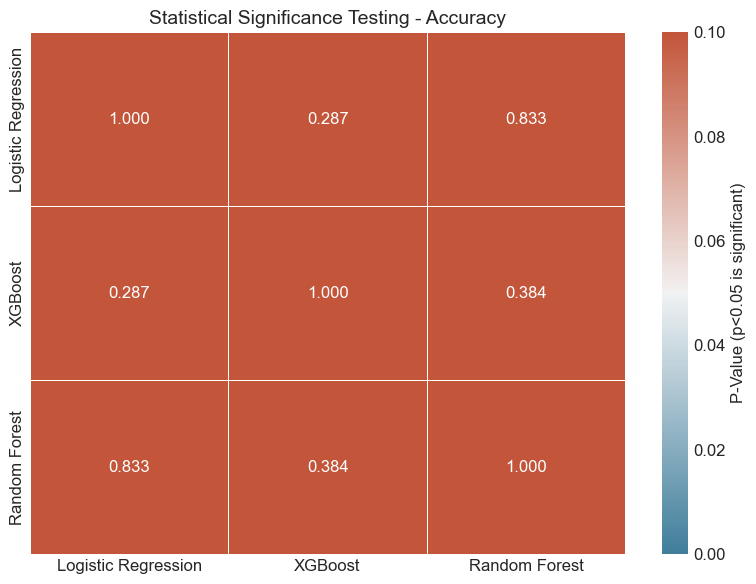

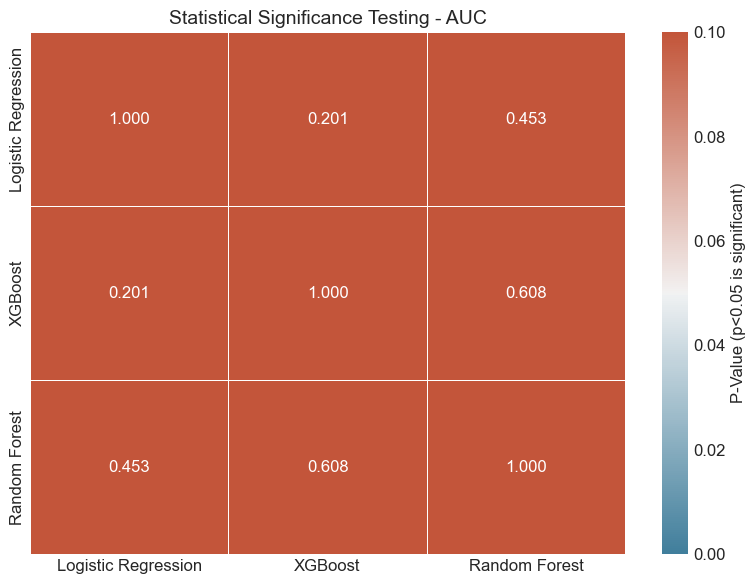

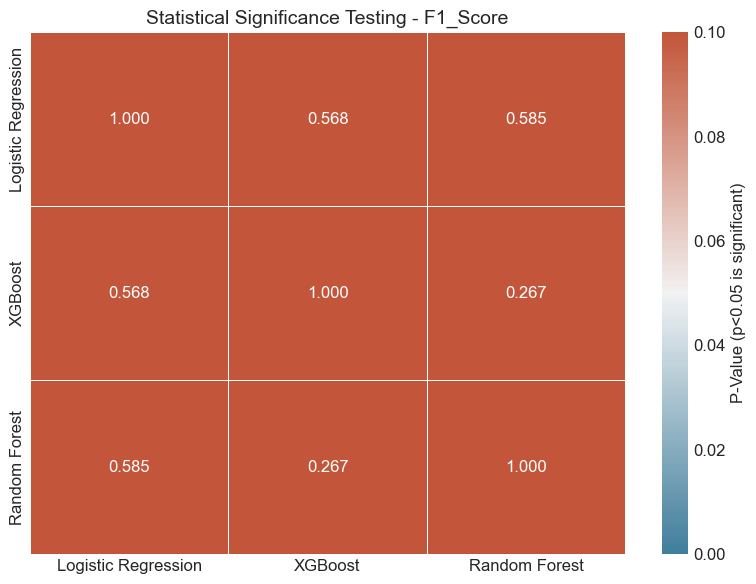

In [82]:
# %% [markdown]
# ## P-Value Heatmaps
# 
# Let's visualize the p-values from the statistical tests.

# %%
# Create heatmaps of p-values for each metric
for metric in metrics:
    metric_sig = sig_df[sig_df['Metric'] == metric].copy()
    
    # Create a matrix of p-values
    p_matrix = pd.DataFrame(1.0, index=models, columns=models)
    for _, row in metric_sig.iterrows():
        p_matrix.loc[row['Model 1'], row['Model 2']] = row['P-Value']
        p_matrix.loc[row['Model 2'], row['Model 1']] = row['P-Value']
    
    plt.figure(figsize=(8, 6))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(p_matrix, annot=True, fmt='.3f', cmap=cmap, 
                vmin=0, vmax=0.10, linewidths=0.5,
                cbar_kws={'label': 'P-Value (p<0.05 is significant)'})
    
    plt.title(f'Statistical Significance Testing - {metric}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f'model_comparison_figures/{metric}_significance.png', dpi=300, bbox_inches='tight')
    plt.show()

In [84]:
# %% [markdown]
# ## Final Recommendation
# 
# Based on our comprehensive analysis, here is the final model ranking and recommendation.

# %%
# Generate the final recommendation
best_model = final_ranking.iloc[0]['Model_Name']
second_best = final_ranking.iloc[1]['Model_Name'] 
worst_model = final_ranking.iloc[2]['Model_Name']

print("\nFINAL MODEL RECOMMENDATION")
print("=" * 50)
print(f"Best Model: {best_model}")
print(f"Second Best: {second_best}")
print(f"Worst Model: {worst_model}")
print("\nBased on comprehensive analysis of performance metrics (Accuracy, AUC, F1 Score),")
print("win rate, and stability across multiple experiments.")

# Create a summary table of results
summary_table = pd.DataFrame({
    'Rank': final_ranking['Rank'],
    'Model': final_ranking['Model_Name'],
    'Avg. Performance': final_ranking['Overall_Score'].round(4),
    'Win Count': final_ranking['Win_Count'],
    'Stability (CV%)': final_ranking['Mean_CV'].round(2),
    'Final Score': final_ranking['Ranking_Score'].round(4)
})

# Display the summary table
display(summary_table)


FINAL MODEL RECOMMENDATION
Best Model: XGBoost
Second Best: Logistic Regression
Worst Model: Random Forest

Based on comprehensive analysis of performance metrics (Accuracy, AUC, F1 Score),
win rate, and stability across multiple experiments.


,Rank,Model,Avg. Performance,Win Count,Stability (CV%),Final Score
0,1,XGBoost,0.7469,5,10.58,1.0000
1,2,Logistic Regression,0.7108,5,12.39,0.3000
2,3,Random Forest,0.7161,0,11.34,0.1891
